# create_NMD_figures notebook

Counts the reads mapping to NMD isoforms vs non-NMD isoforms and plot the results, take II

## 1.0 Loading dependencies

For dependencies, it is useful to follow the directions provided in the README.md file of the github repository, specifically the instructions for `SettingRobinsonLabNotebook.MD`. https://github.com/TheJacksonLaboratory/sbas/blob/master/SettingUpRobinsonLabNotebook.MD

If required dependencies are needed, refer to the documentation to go further with Christina’s gitbook.

https://lifebit.gitbook.io/cloudos/web-interface/jupyter-lab#how-can-i-install-the-dependencies-i-need-in-the-notebook-session


In [1]:
suppressWarnings({suppressMessages({
library(Biostrings)
library(rtracklayer)
library(ggplot2)
})})

2 Unpack the data.tar file if necessary
To run this script, we need to import three compressed files and unpack them.

| file | sha256 | filename  |
|------|------  |-----------|
|  1   | b0c4bb23b96d77aba7e731fa2a15dc74a34daf490312478aca94443f9a6d4e90 | results/data_as_dge.tar.gz |
|  2   | a0c2c5a7d7cfa0a89c8a39e2f7a4c6c3ac8c6a860f721077c087614505d869cf | rmats_and_annotation.tar.gz |

The NMD_summary.txt file is found in "../assets/"

In [2]:
data_as_dge_file_dir <- list.files("../../mounted-data", pattern='data_as_dge.tar.gz')
data_as_dge_file_dir
rmats_and_annotation_dir <- list.files("../../mounted-data", pattern='rmats_and_annotation.tar.gz')
rmats_and_annotation_dir
NMD_summary_dir <- list.files("../assets", pattern='NMD_summary.txt')
NMD_summary_dir

[1] "5f04e7b4143fa001139bdff8-data_as_dge.tar.gz-5f04e7b4143fa001139bdff8"

[1] "5f04e998143fa001139becf6-rmats_and_annotation.tar.gz-5f04e998143fa001139becf6"

[1] "NMD_summary.txt"

In [3]:
dataDir <- "../data/"

metadata.file.name    = paste0(dataDir, "srr_pdata.csv")
if (!(file.exists(metadata.file.name))) {
    data_as_dge_file_dir <- list.files("../../mounted-data", pattern='data_as_dge.tar.gz')
    data_as_dge_file <- paste("../../mounted-data", data_as_dge_file_dir, 'robinson-bucket/notebooks/data_as_dge', sep='/')
    data_as_dge_file_tar_gz <- paste(data_as_dge_file, '.tar.gz', sep='')
    message("In order to unpack the necessary files, execute the following commands on the shell.")
    message("data_as_dge.tar.gz")
    mycommand = paste("tar xvfz ",data_as_dge_file_tar_gz, "-C ../data", sep=" ")
    message(mycommand)
    system(mycommand)
    message("checking sha256sum")
    mycommand = paste("sha256sum", data_as_dge_file_tar_gz, sep = " ")
    message(mycommand)
    system(mycommand)
}

skip.counts.file.name <- paste0(dataDir, "rmats_final.se.jc.sjc.txt.gz")
inc.counts.file.name  = paste0(dataDir, "rmats_final.se.jc.ijc.txt.gz")
if (!(file.exists(inc.counts.file.name)) | !(file.exists(skip.counts.file.name))) {
    rmats_annot_file_dir <- list.files("../../mounted-data", pattern='rmats_and_annotation.tar.gz')
    rmats_annot_file <- paste("../../mounted-data", rmats_annot_file_dir, 'robinson-bucket/notebooks/rmats_and_annotation', sep='/')
    rmats_annot_file_tar_gz <- paste(rmats_annot_file, '.tar.gz', sep='')
    message("In order to unpack the necessary files, execute the following commands on the shell.")
    message("rmats_and_annotation.tar.gz")
    mycommand = paste("tar xvfz ",rmats_annot_file_tar_gz, "-C ../data", sep=" ")
    message(mycommand)
    system(mycommand)
    message("checking sha256sum")
    mycommand = paste("sha256sum", rmats_annot_file_tar_gz, sep = " ")
    message(mycommand)
    system(mycommand)
}


nmd.tab.file <- paste0("../assets/", "NMD_summary.txt")
if (!(file.exists(nmd.tab.file))) {
    message("checking sha256sum")
    mycommand = paste("sha256sum", "../data/NMD_summary.txt", sep = " ")
    message(mycommand)
    system(mycommand)
    NMD_summary_dir <- list.files("../../mounted-data", pattern='NMD_summary.txt.gz')
    NMD_summary_file <- paste("../../mounted-data", NMD_summary_dir, 'robinson-bucket/notebooks/NMD_summary.txt', sep='/')
    NMD_summary_file_gz <- paste(NMD_summary_file, '.gz', sep='')
    message("In order to unpack the necessary files, execute the following commands on the shell.")
    message("NMD_summary_file_gz")
    mycommand = paste("gunzip ",NMD_summary_file_gz, " ../data", sep=" ")
    message(mycommand)
    system(mycommand)    
}


## 2.0 preprocessing or read in the files


In [4]:
meta.data = readr::read_csv(metadata.file.name)
dim(meta.data)

inc.counts   = as.data.frame(data.table::fread(inc.counts.file.name))
dim(inc.counts)

skip.counts  = as.data.frame(data.table::fread(skip.counts.file.name))
dim(skip.counts)

nmd.tab.file
nmd.tab <- read.table(nmd.tab.file, header=TRUE, sep = "\t")
head(nmd.tab, 24)

Parsed with column specification:
cols(
  .default = col_double(),
  SAMPID = col_character(),
  SMATSSCR = col_character(),
  SMCENTER = col_character(),
  SMPTHNTS = col_character(),
  SMTS = col_character(),
  SMTSD = col_character(),
  SMUBRID = col_character(),
  SMNABTCH = col_character(),
  SMNABTCHT = col_character(),
  SMNABTCHD = col_character(),
  SMGEBTCH = col_character(),
  SMGEBTCHD = col_character(),
  SMGEBTCHT = col_character(),
  SMAFRZE = col_character(),
  SMGTC = col_logical(),
  SMNUMGPS = col_logical(),
  SM550NRM = col_logical(),
  SM350NRM = col_logical(),
  SMMNCPB = col_logical(),
  SMMNCV = col_logical()
  # ... with 6 more columns
)

See spec(...) for full column specifications.



[1] 7872   68

[1] 42611  8674

[1] 42611  8674

[1] "../assets/NMD_summary.txt"

,num.nmd,num.transcripts,nmd.ids
,<int>,<int>,<fct>
1,0,1,
2,0,4,
3,0,1,
4,0,0,
5,0,0,
6,0,0,
7,0,0,
8,0,0,
9,0,0,


## 3.0 make figure

Create a data frame with counts for each tissue and generate a boxplot for it

[1] TRUE

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



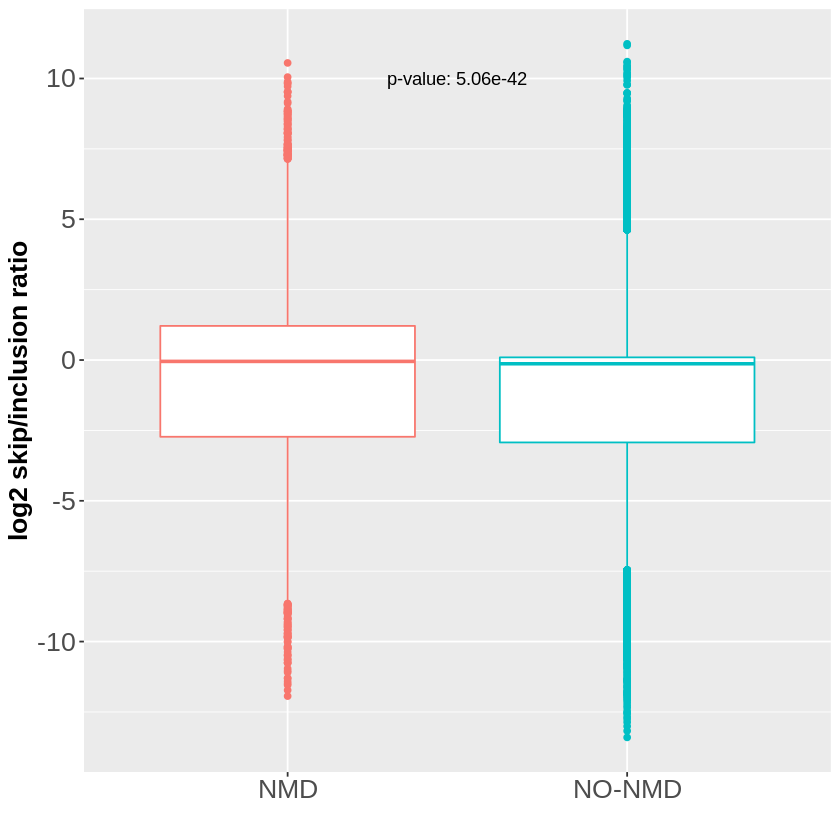

Saving 6.67 x 6.67 in image



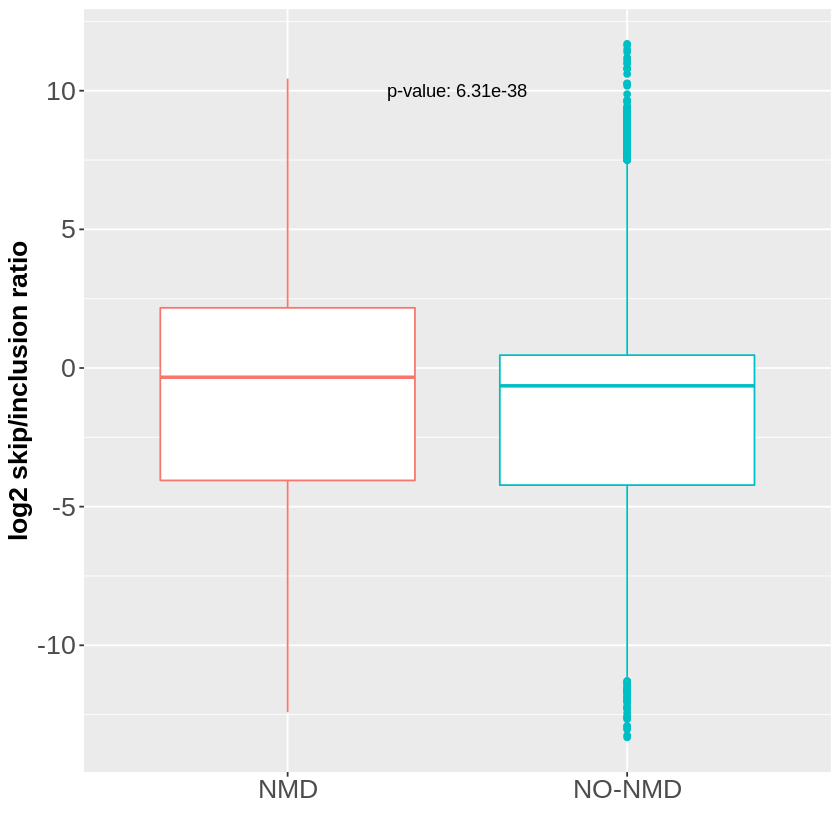

Saving 6.67 x 6.67 in image



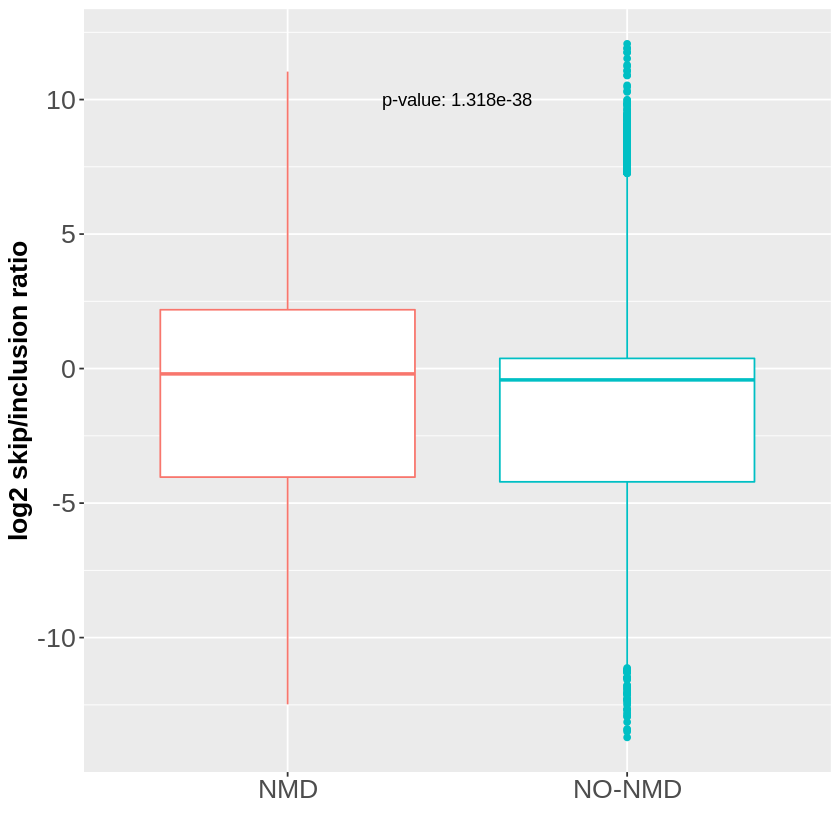

Saving 6.67 x 6.67 in image



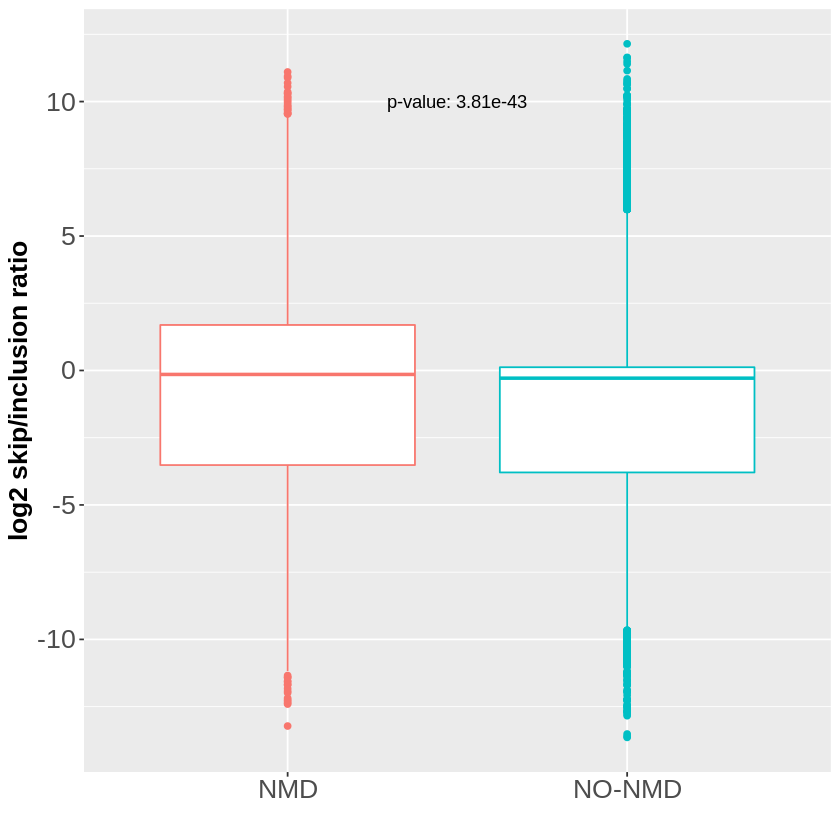

Saving 6.67 x 6.67 in image



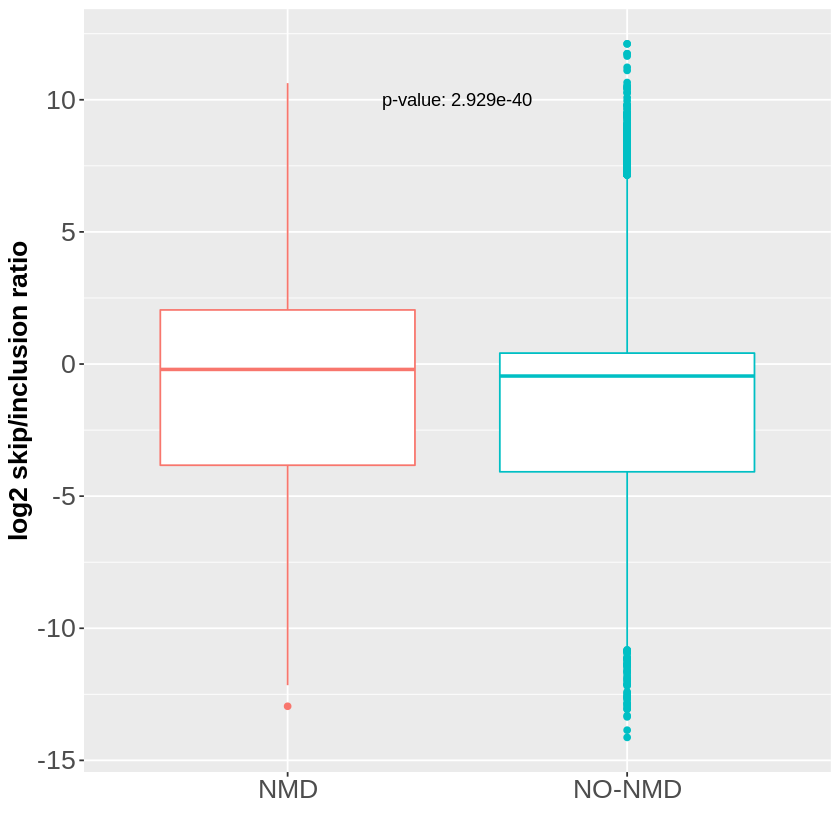

Saving 6.67 x 6.67 in image



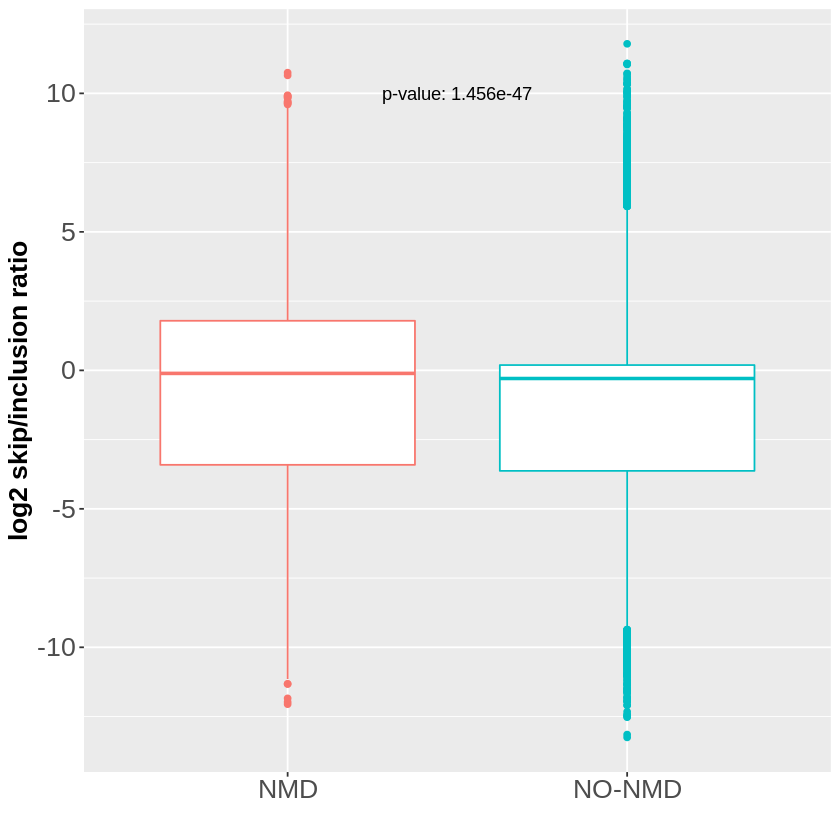

Saving 6.67 x 6.67 in image



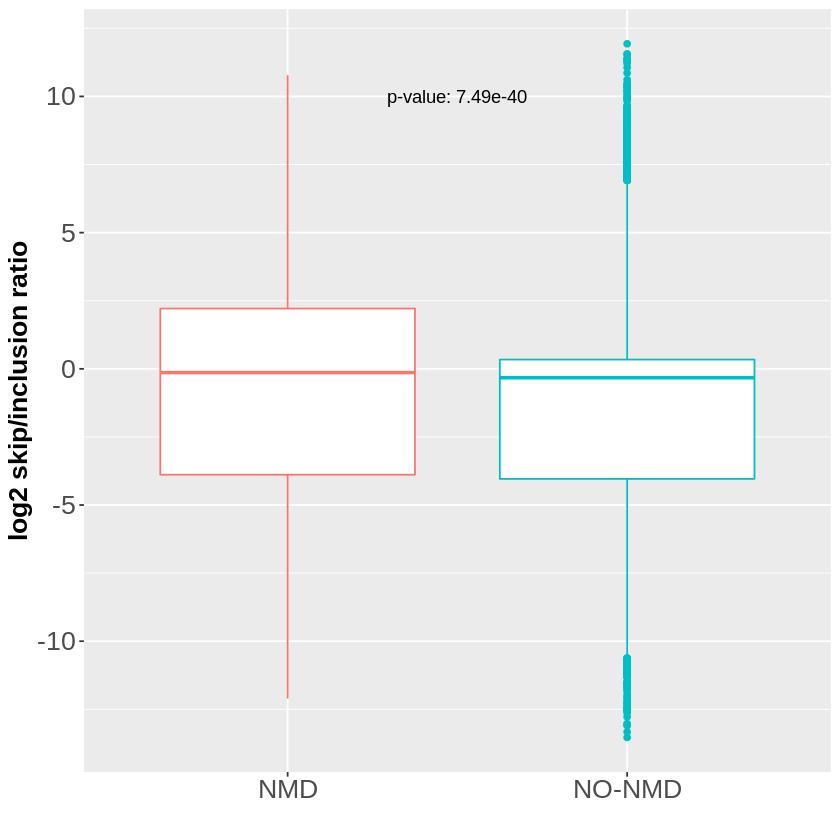

Saving 6.67 x 6.67 in image



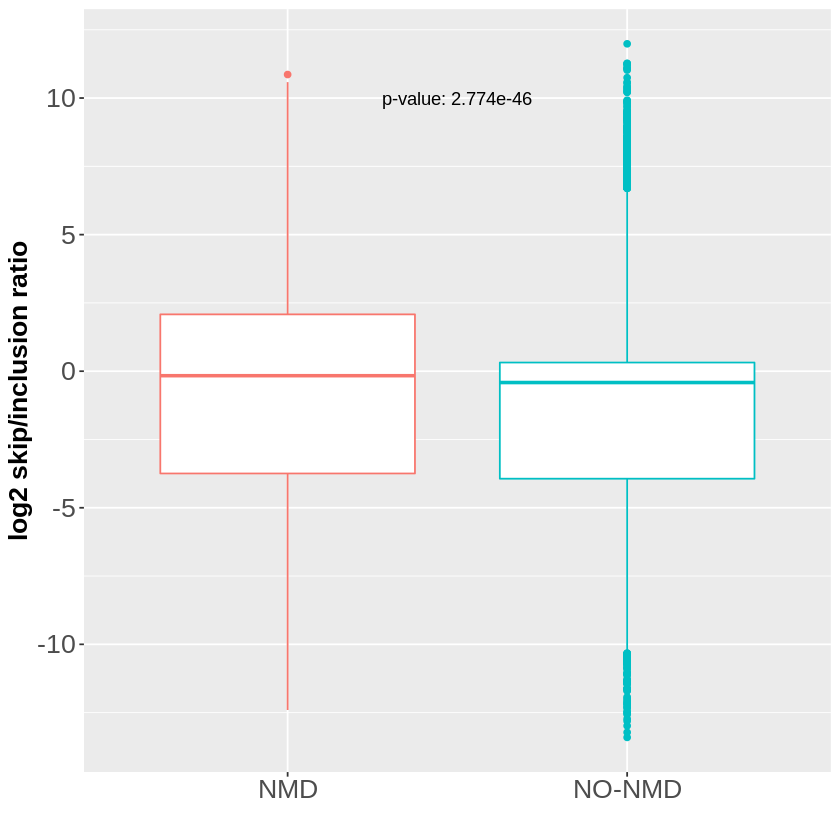

Saving 6.67 x 6.67 in image



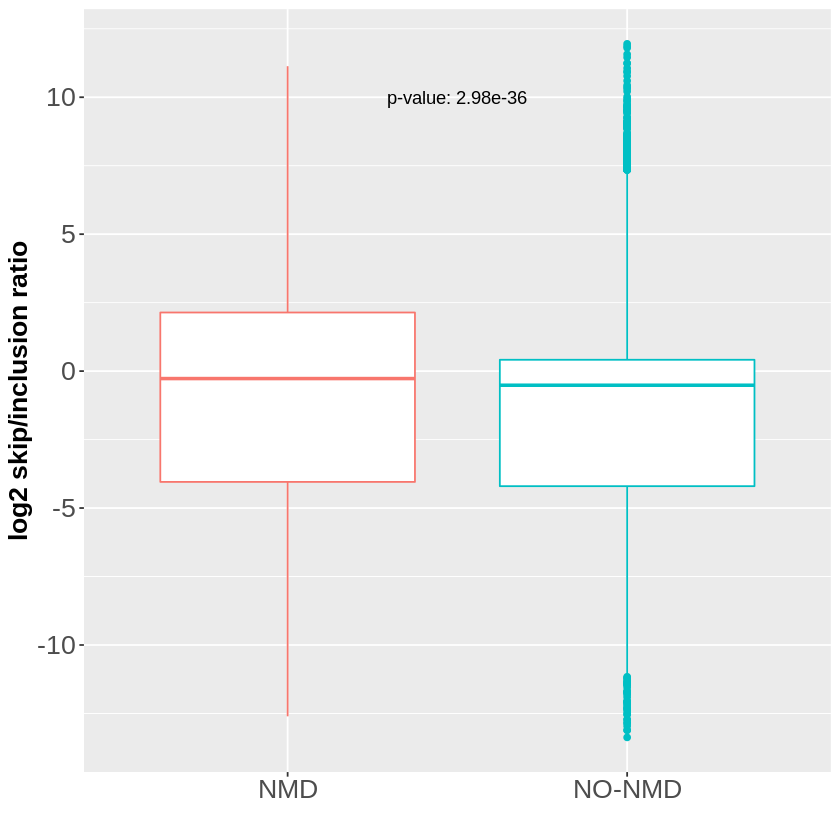

Saving 6.67 x 6.67 in image



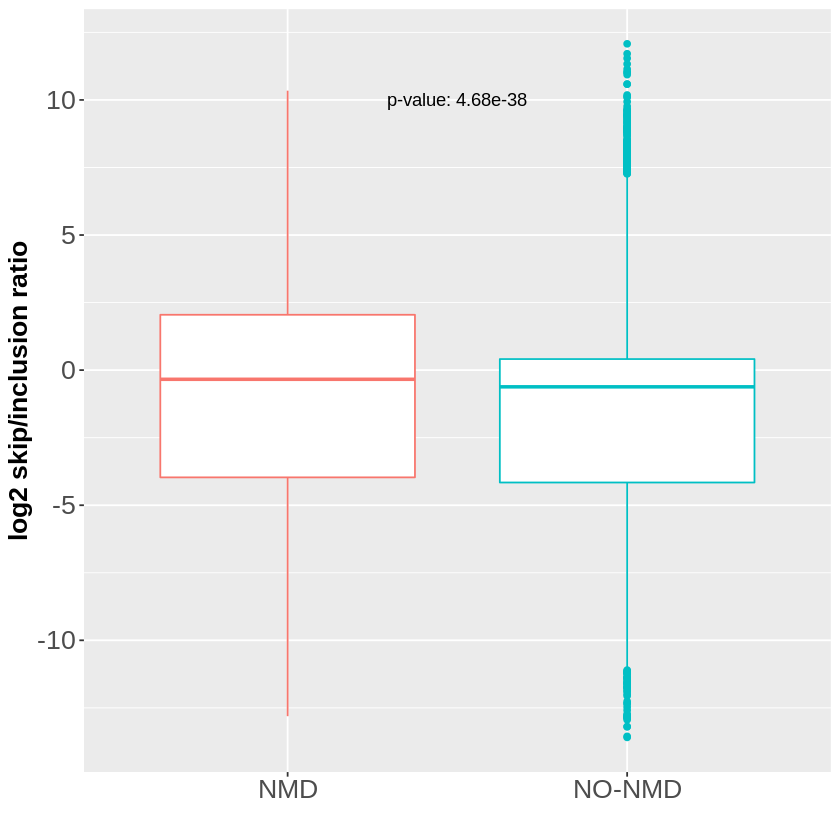

Saving 6.67 x 6.67 in image



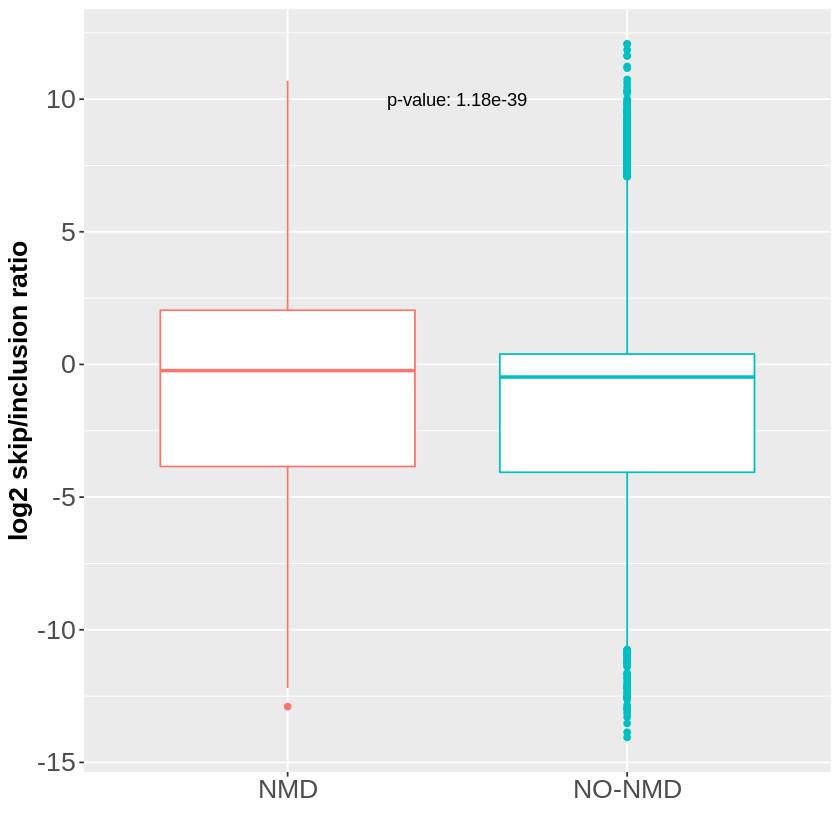

Saving 6.67 x 6.67 in image



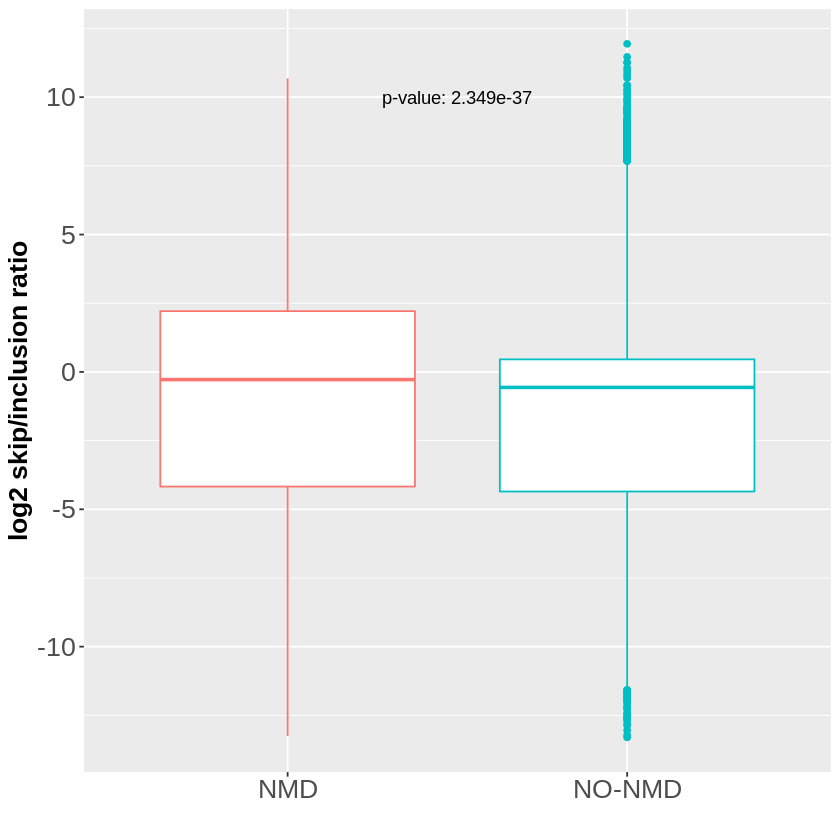

Saving 6.67 x 6.67 in image



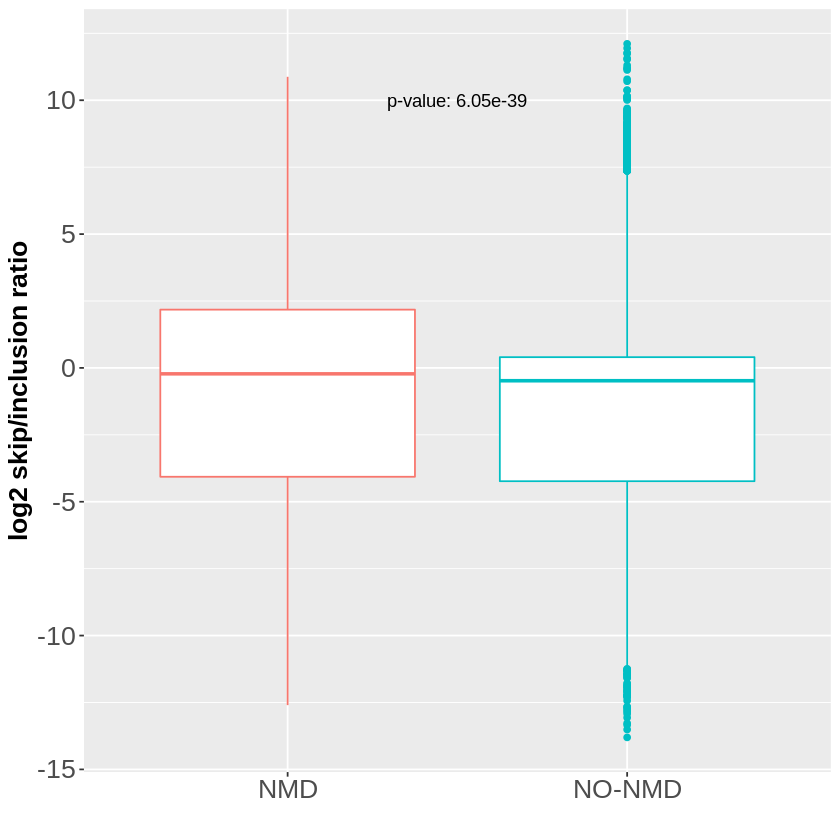

Saving 6.67 x 6.67 in image



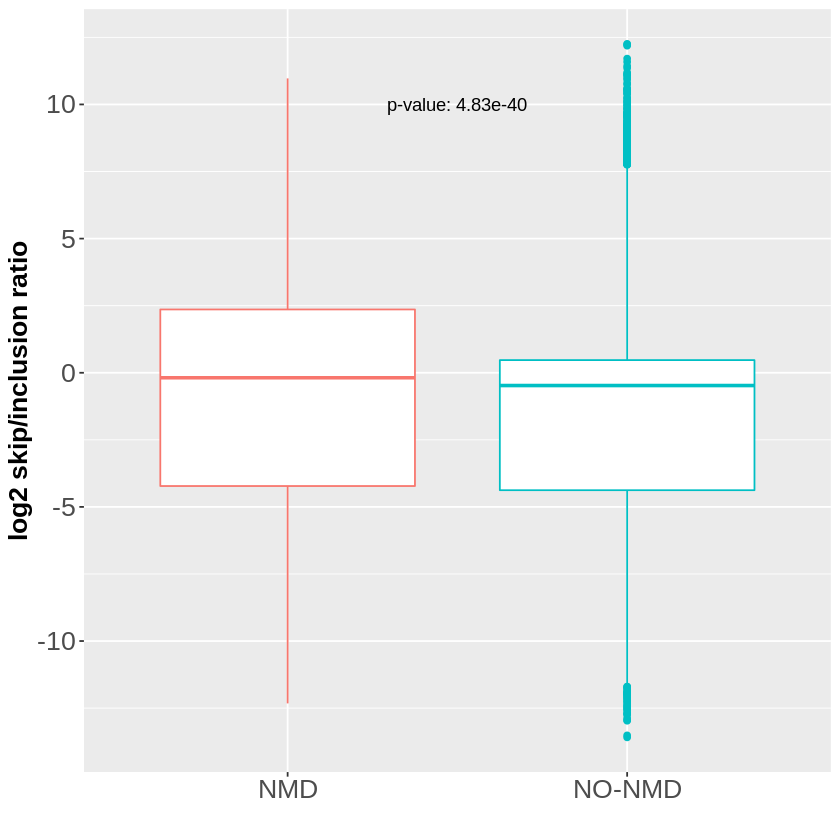

Saving 6.67 x 6.67 in image



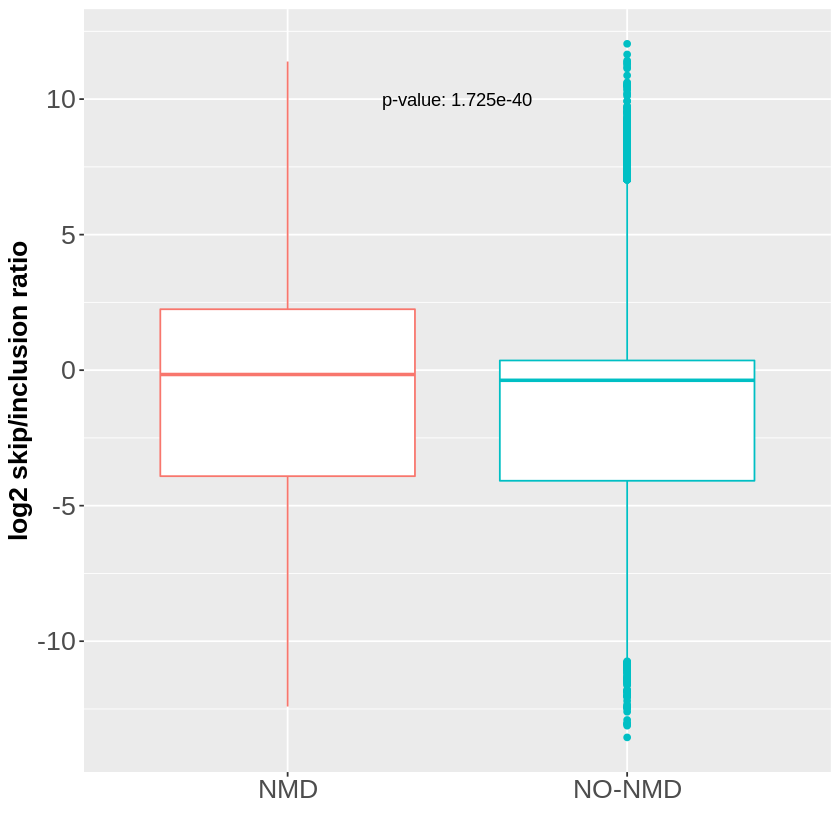

Saving 6.67 x 6.67 in image



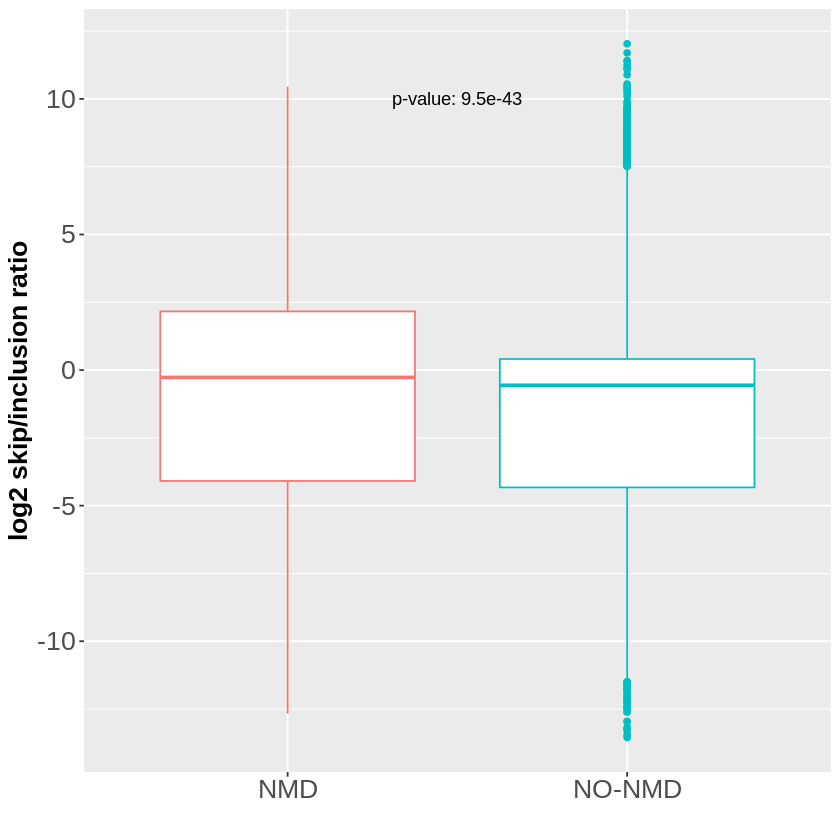

Saving 6.67 x 6.67 in image



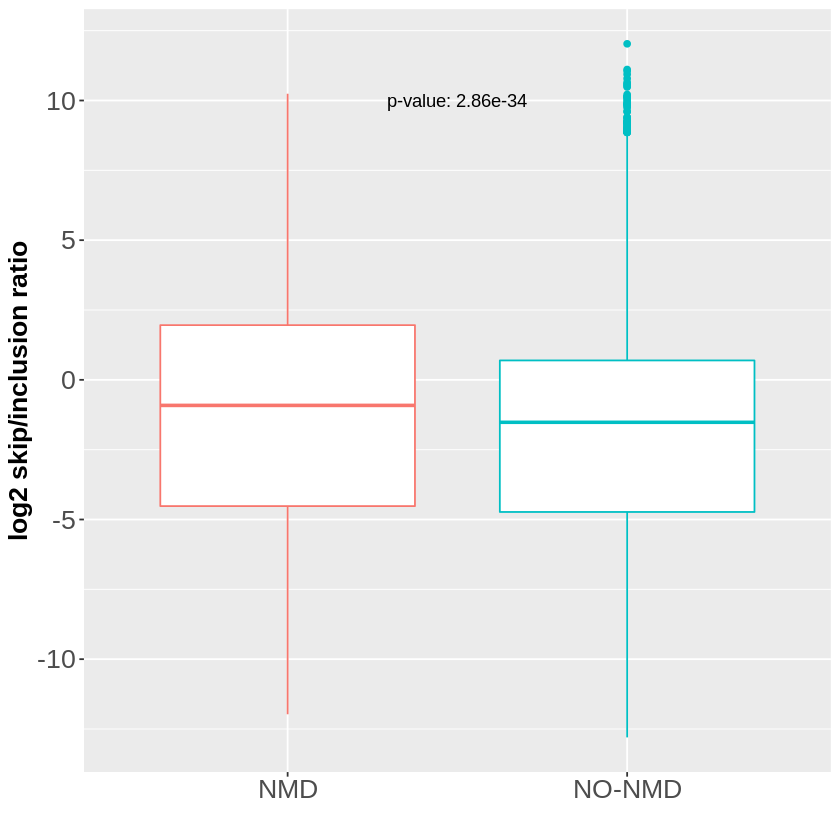

Saving 6.67 x 6.67 in image



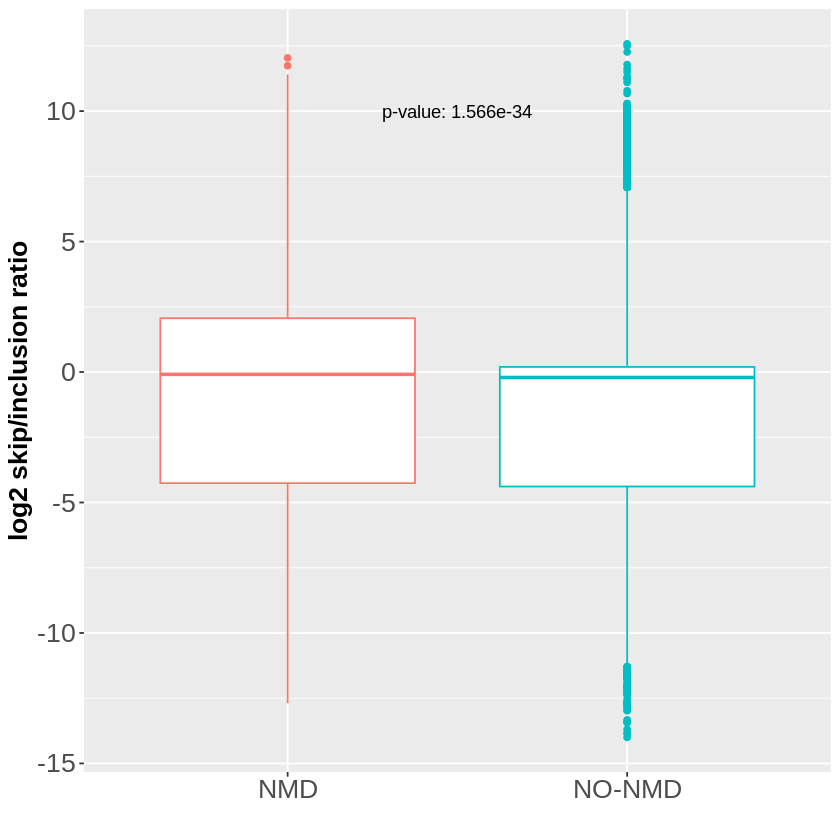

Saving 6.67 x 6.67 in image



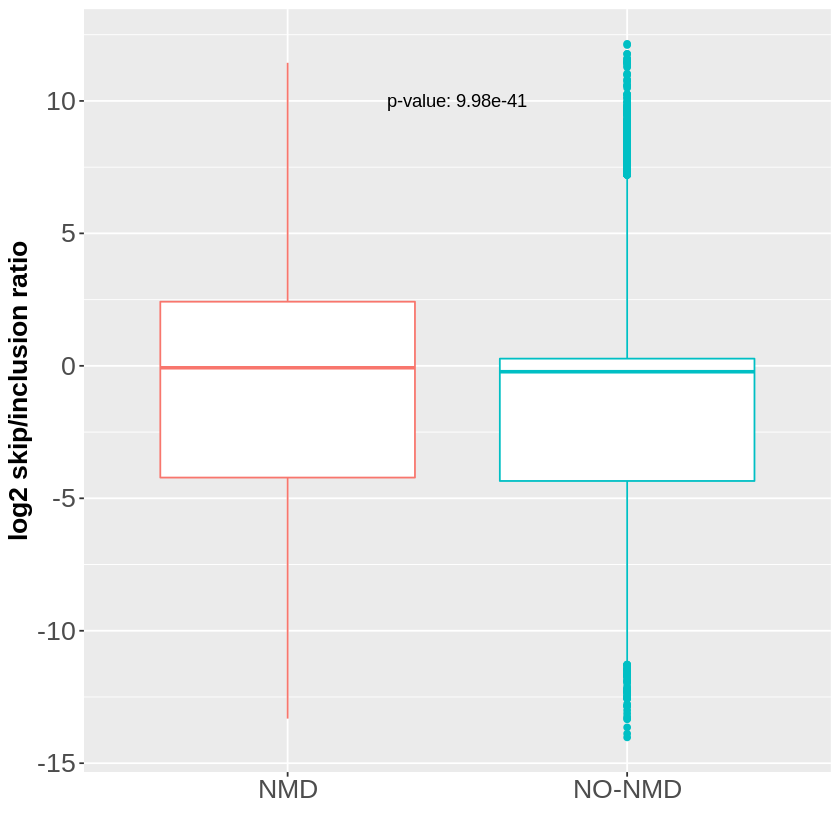

Saving 6.67 x 6.67 in image



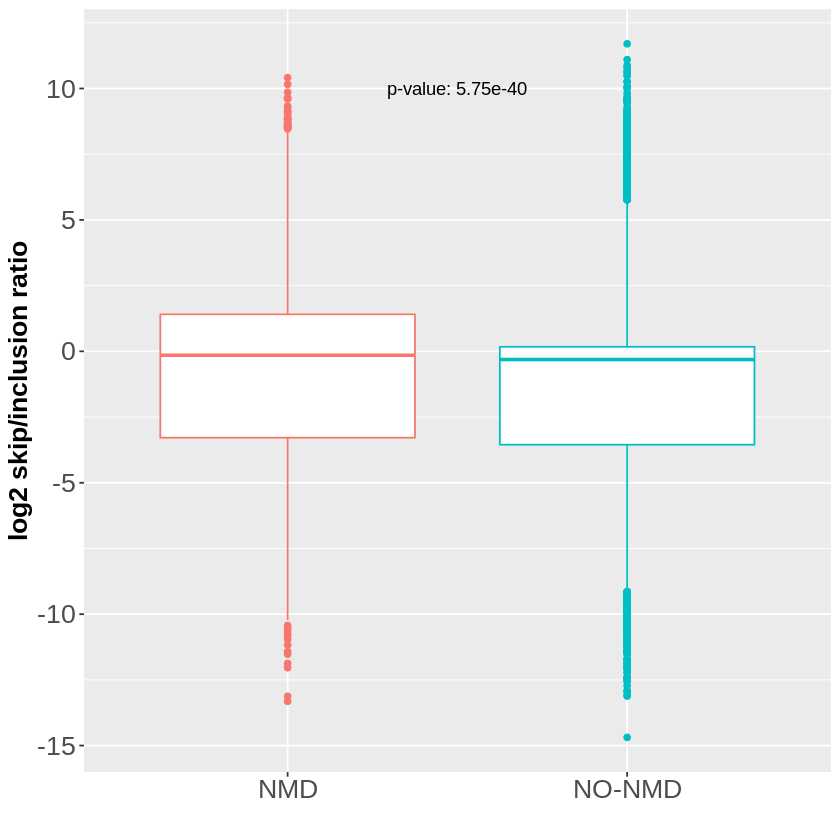

Saving 6.67 x 6.67 in image



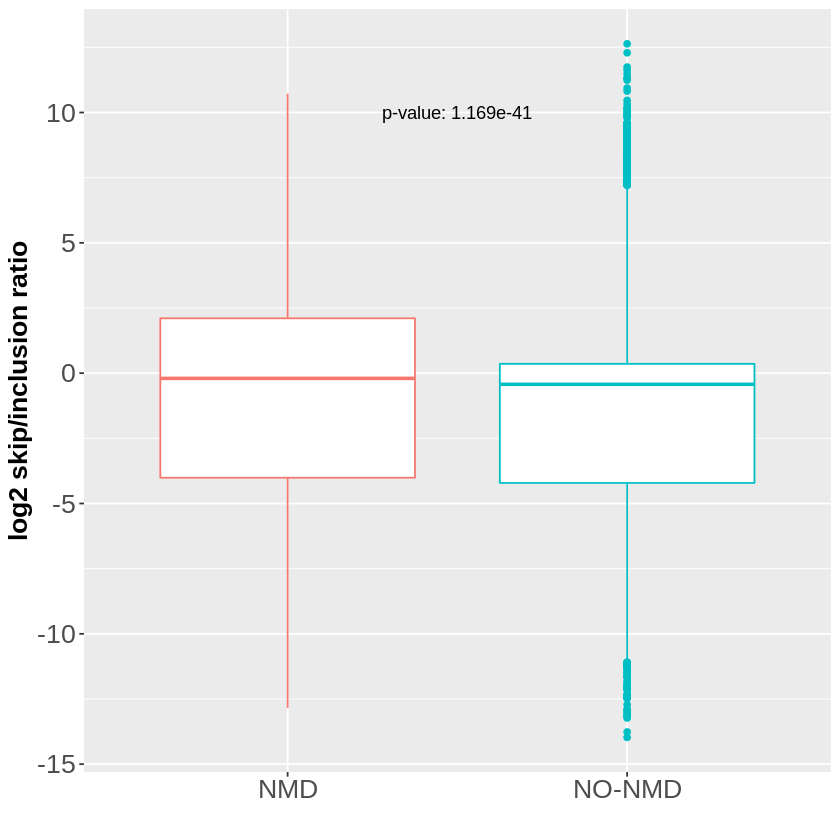

Saving 6.67 x 6.67 in image



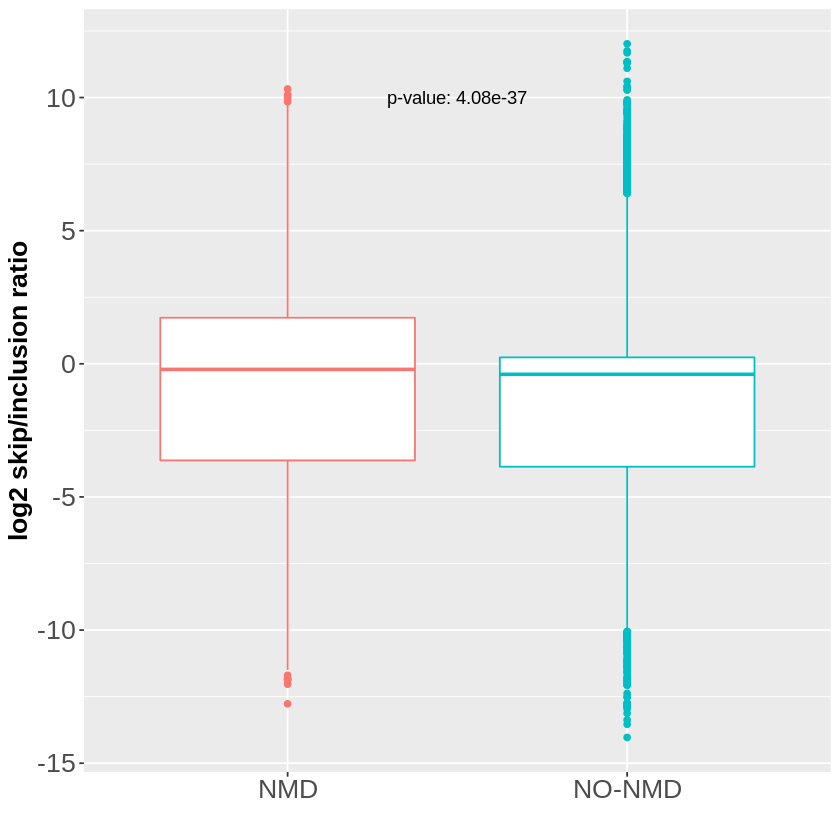

Saving 6.67 x 6.67 in image



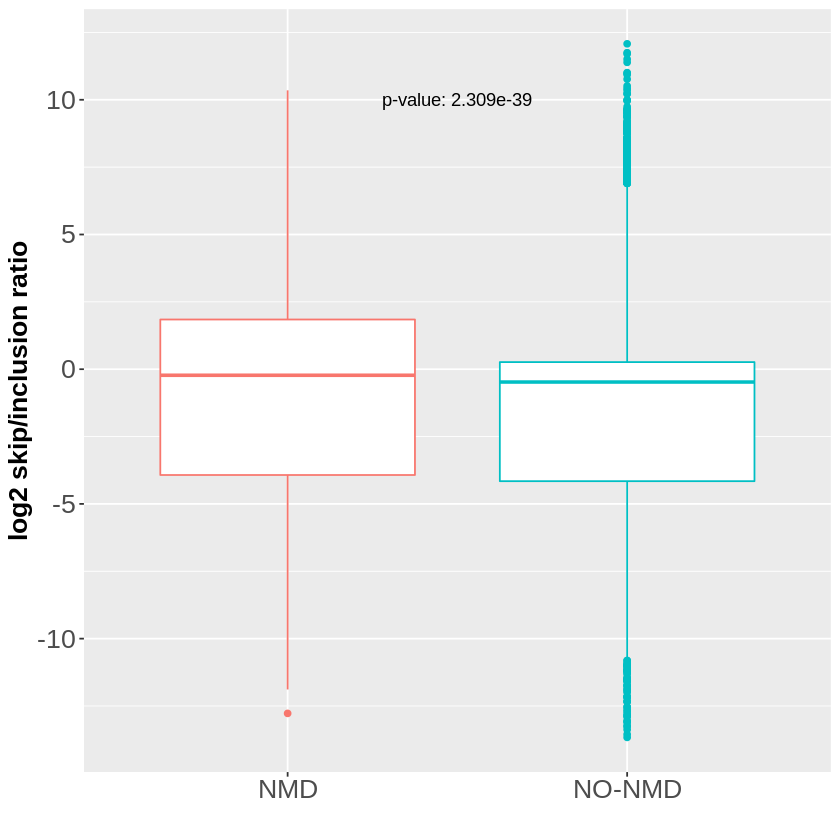

Saving 6.67 x 6.67 in image



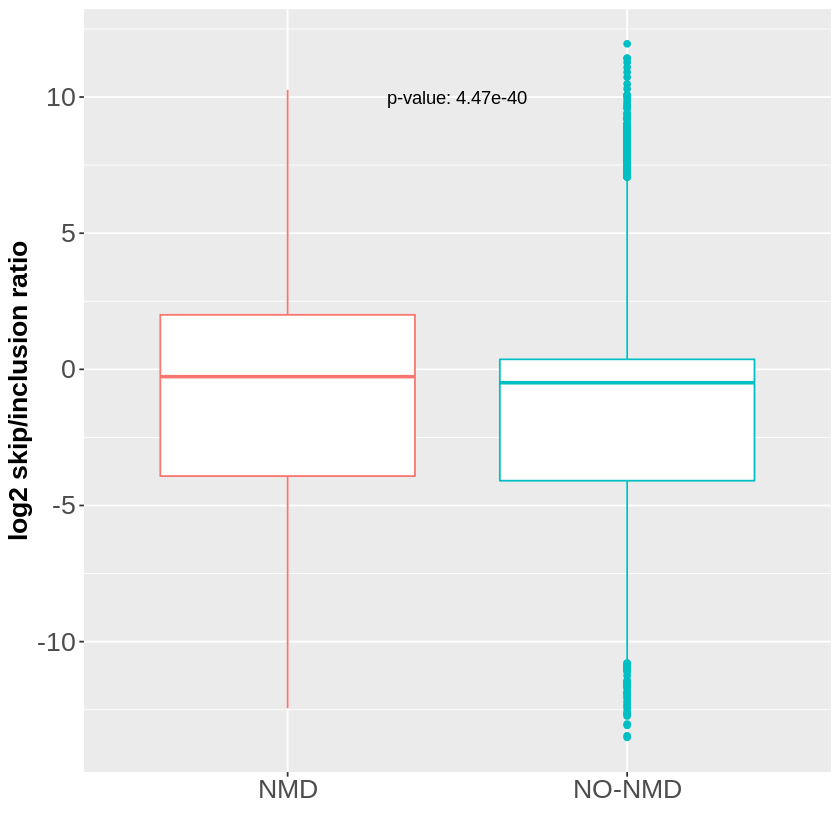

Saving 6.67 x 6.67 in image



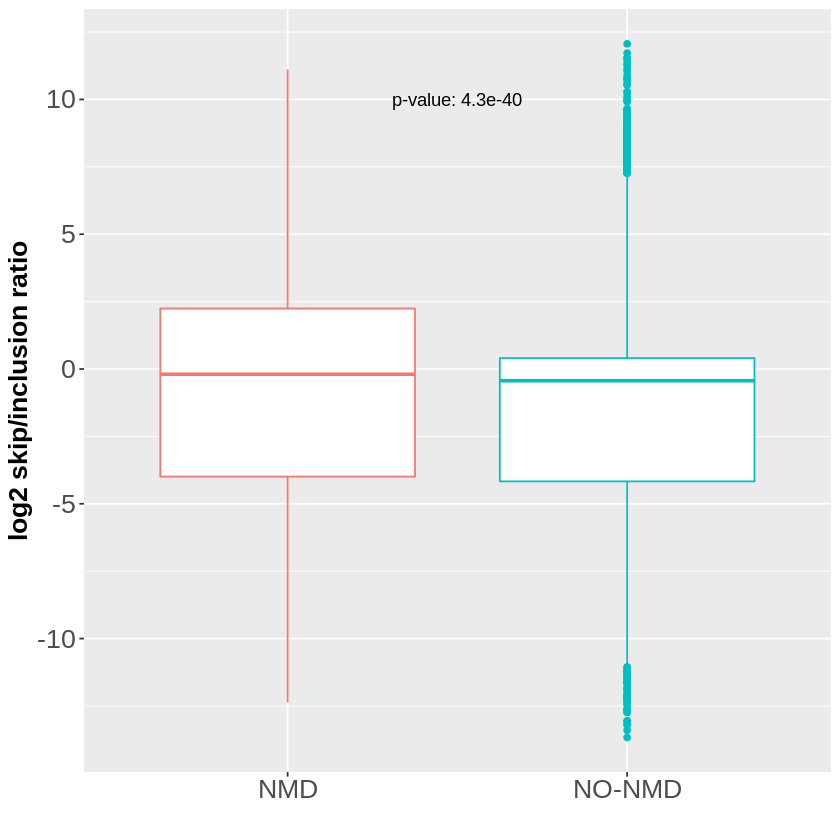

Saving 6.67 x 6.67 in image



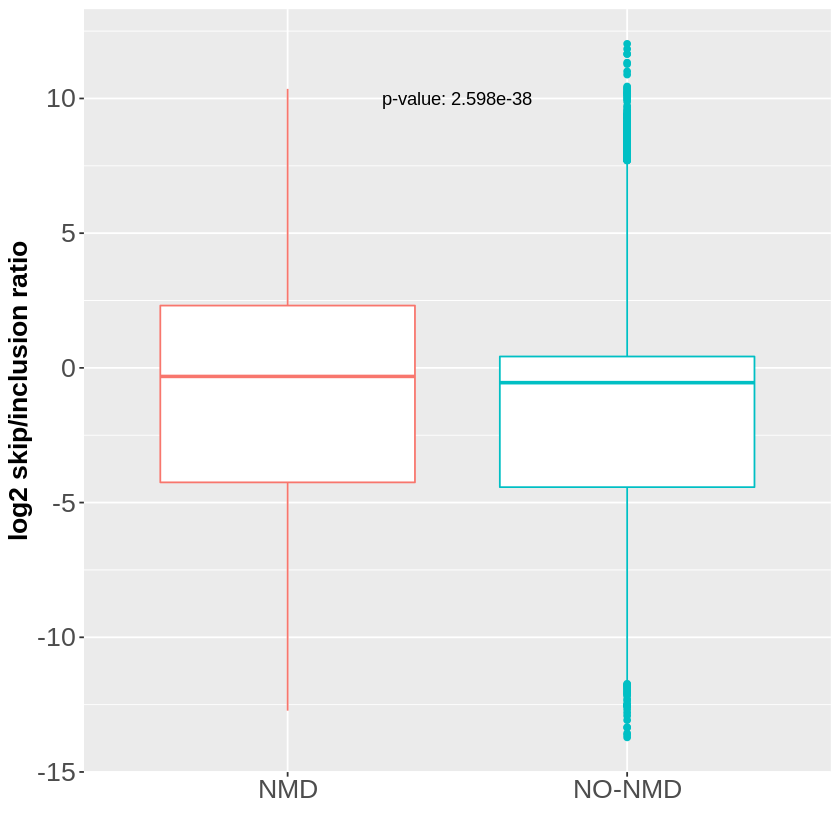

Saving 6.67 x 6.67 in image



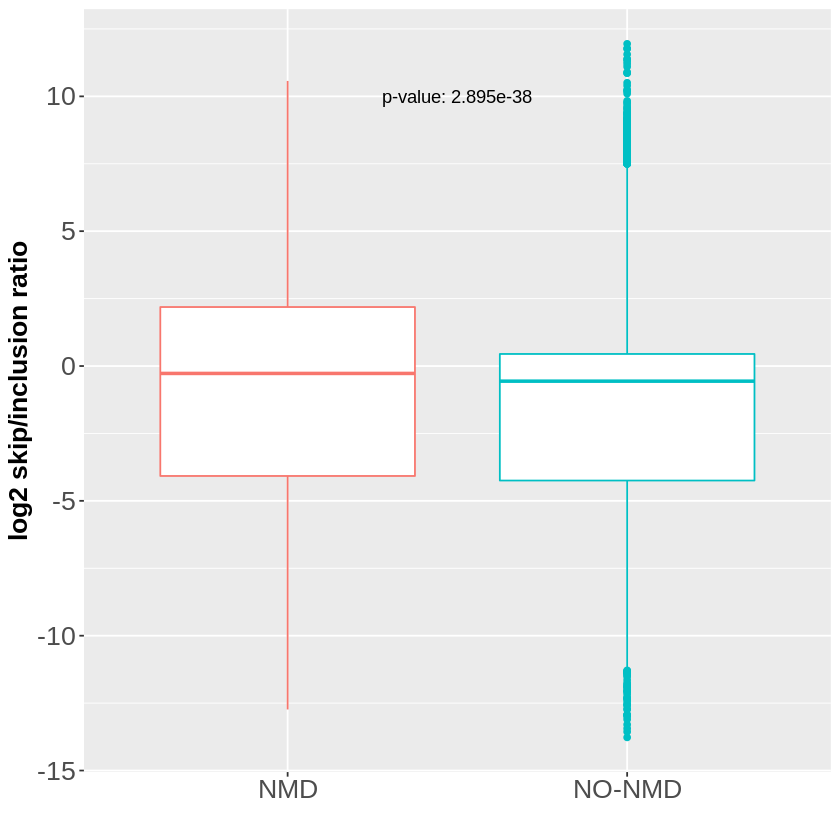

Saving 6.67 x 6.67 in image



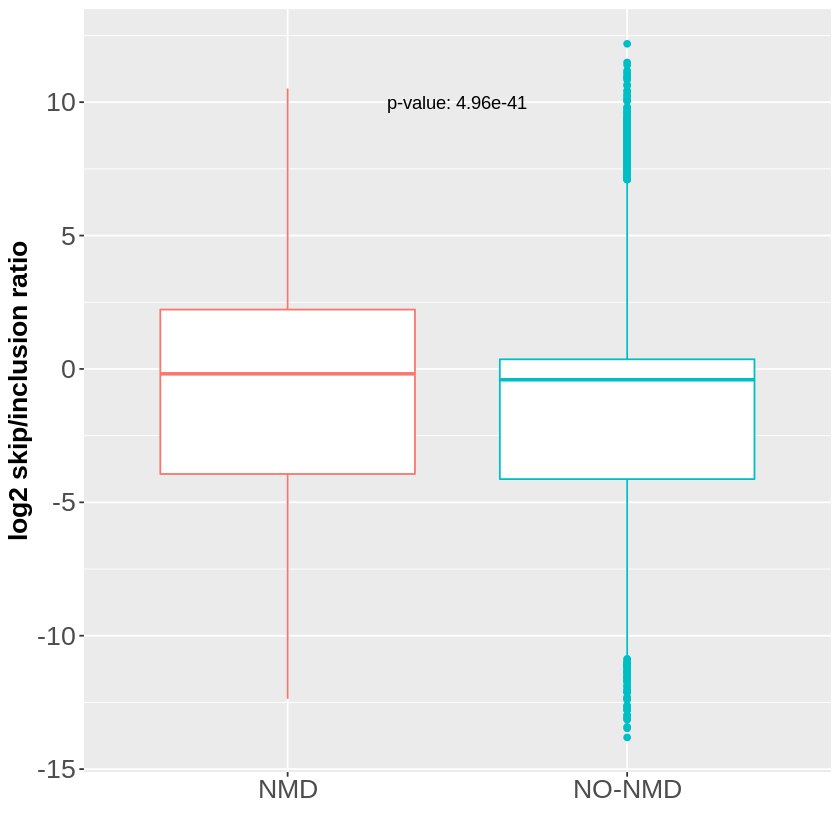

Saving 6.67 x 6.67 in image



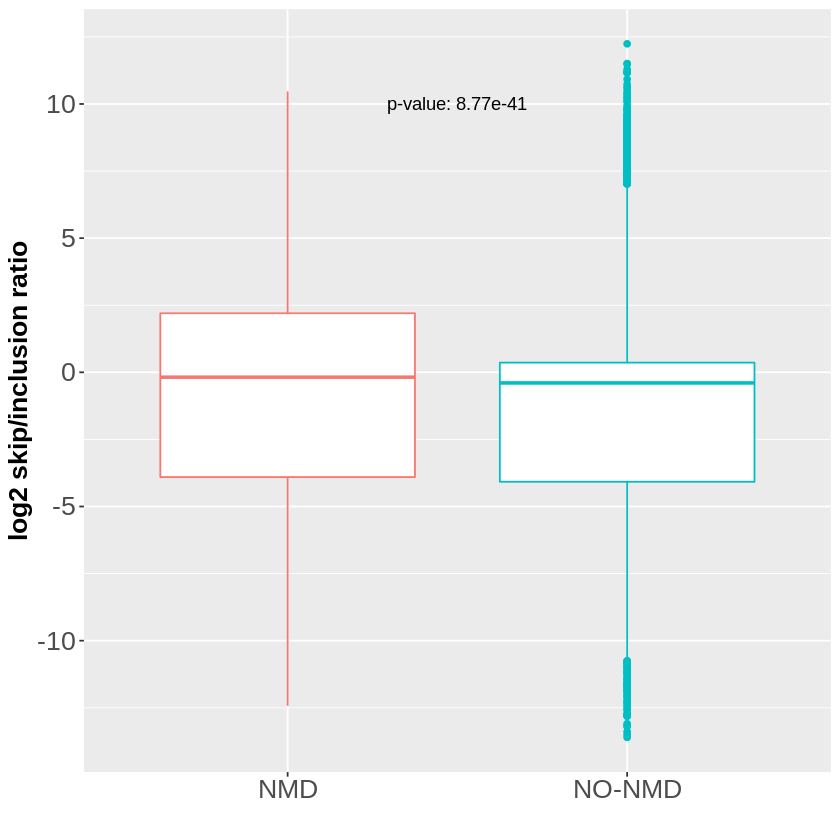

Saving 6.67 x 6.67 in image



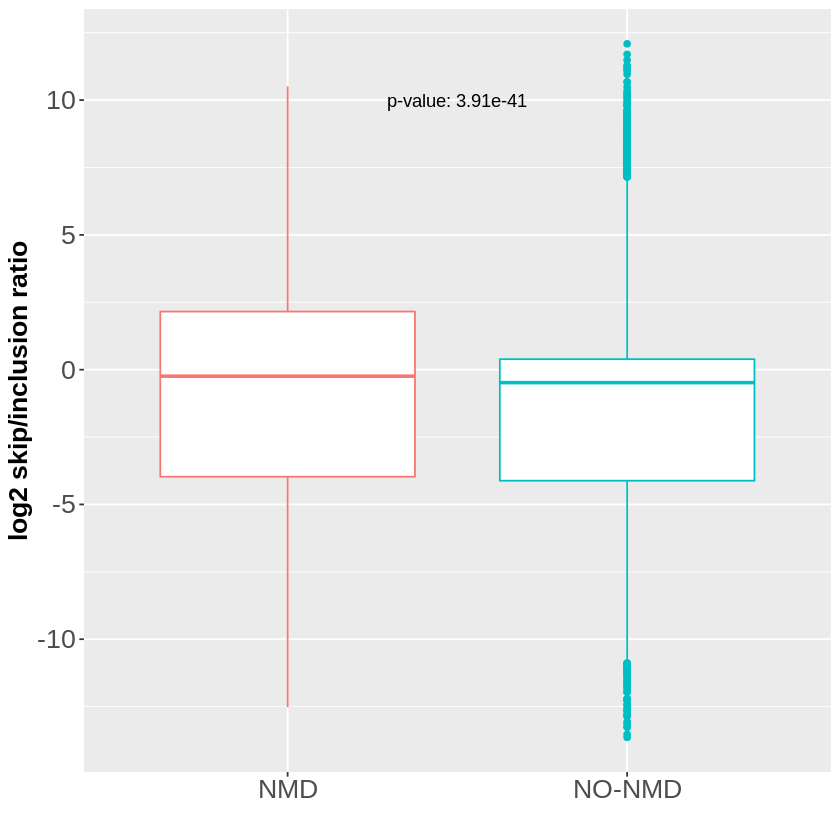

Saving 6.67 x 6.67 in image



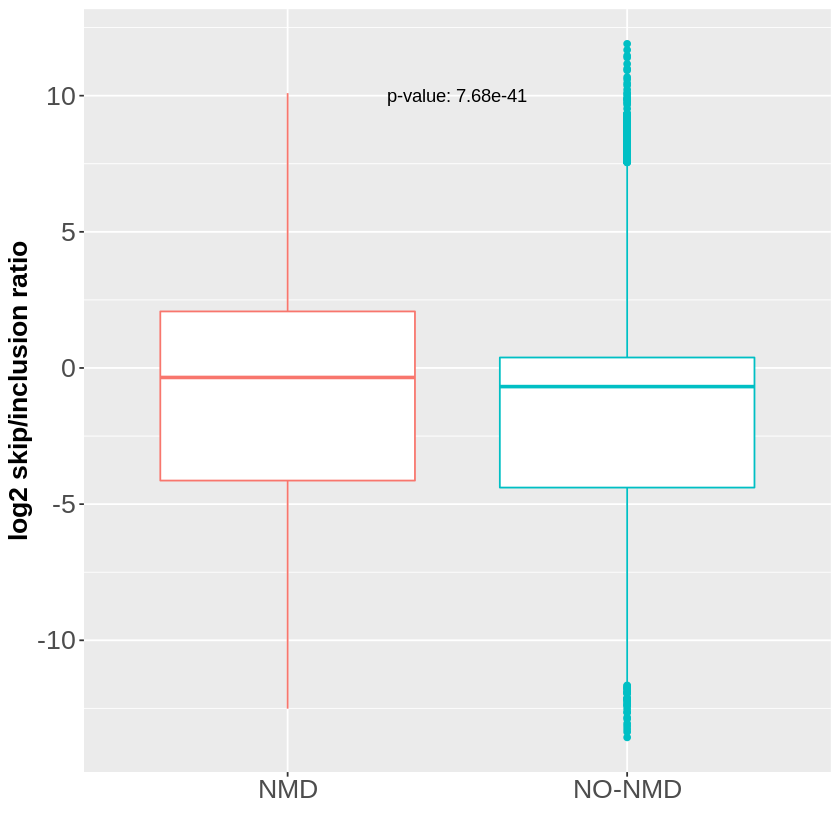

Saving 6.67 x 6.67 in image



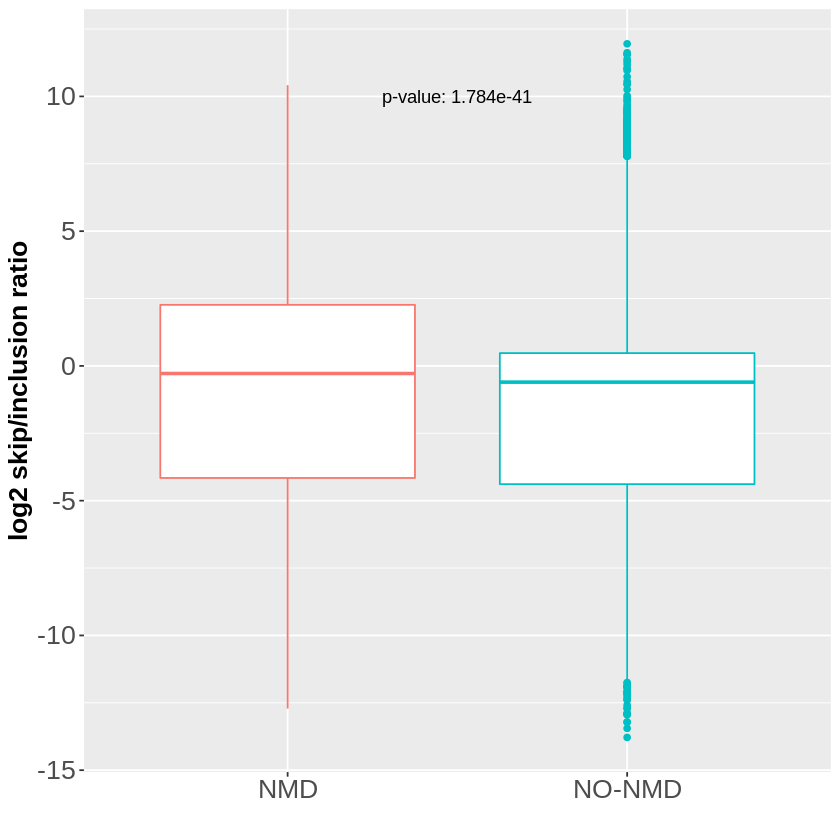

Saving 6.67 x 6.67 in image



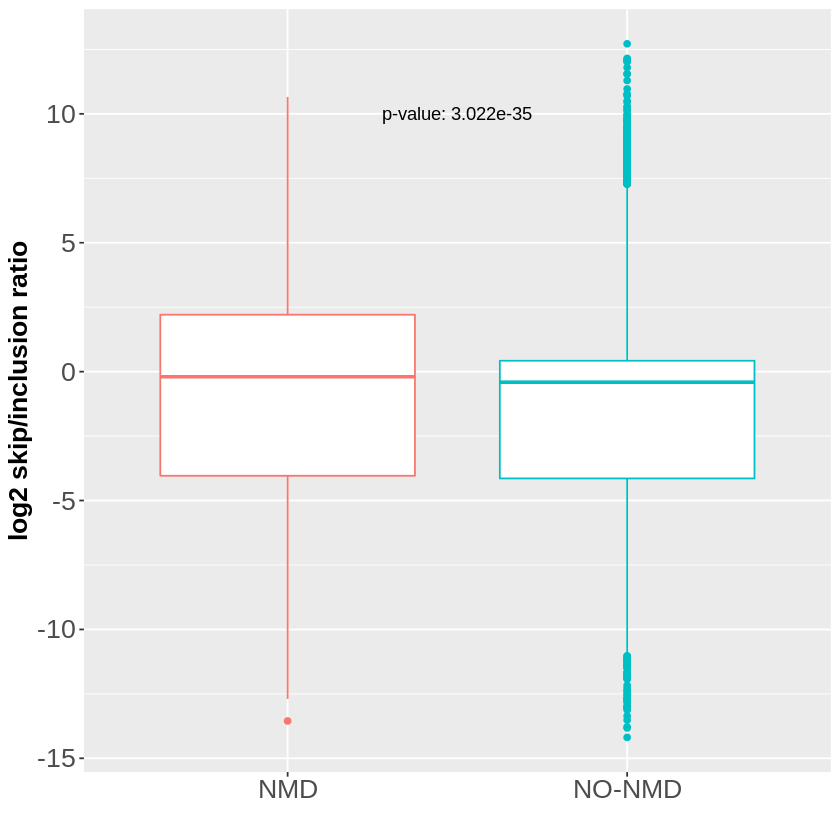

Saving 6.67 x 6.67 in image



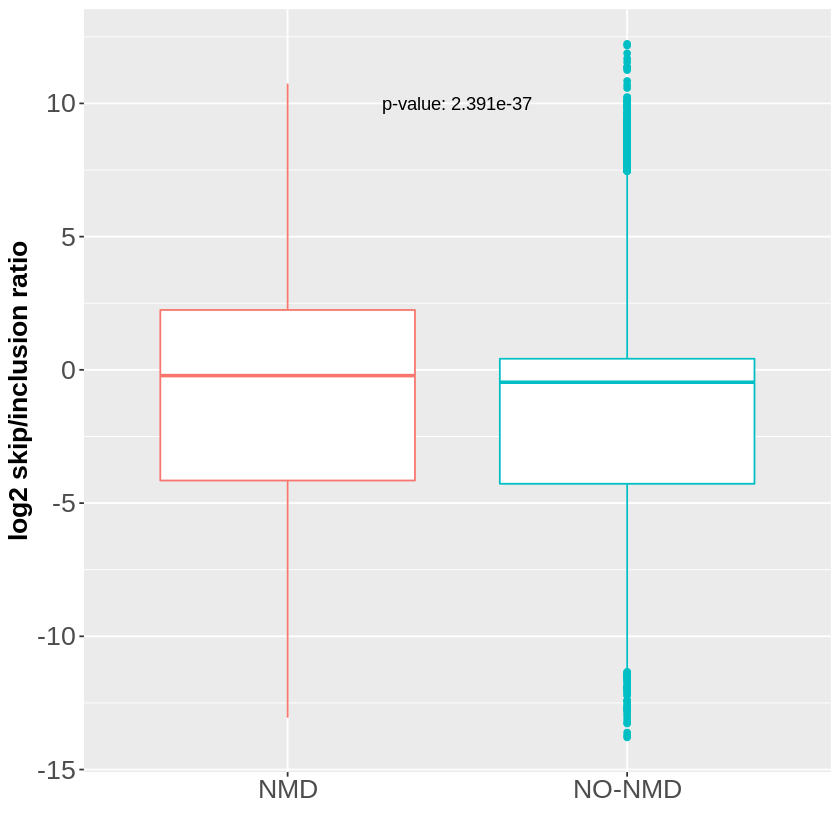

Saving 6.67 x 6.67 in image



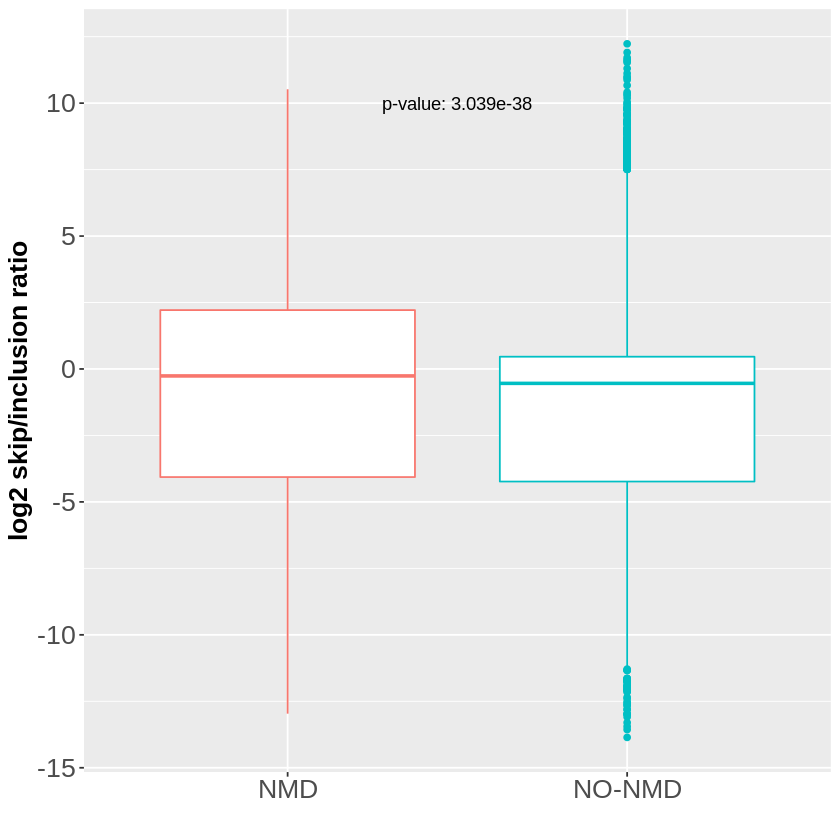

Saving 6.67 x 6.67 in image



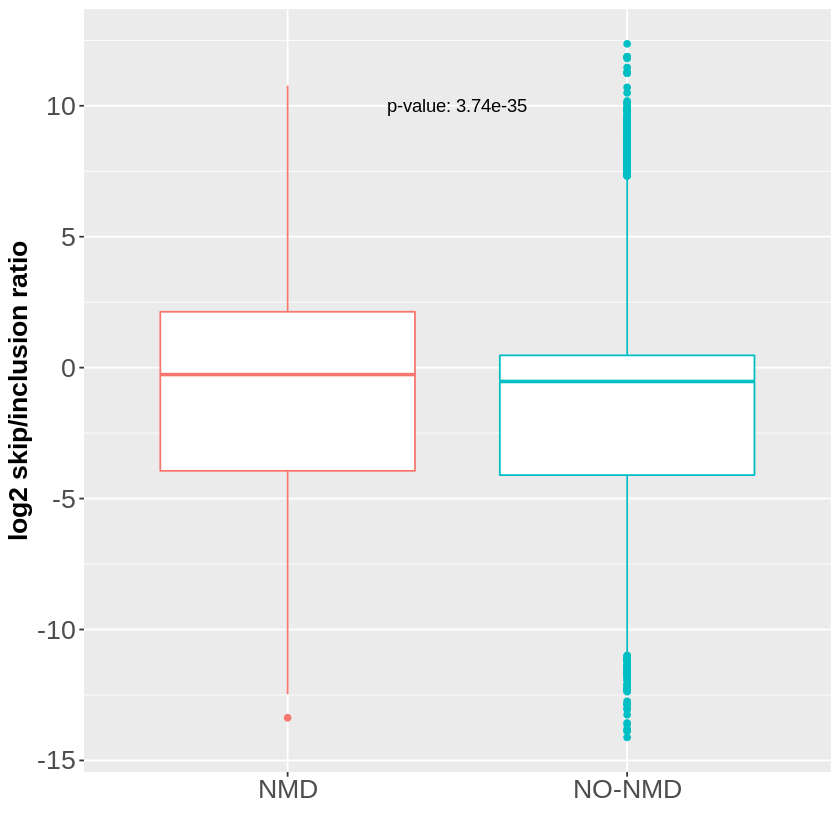

Saving 6.67 x 6.67 in image



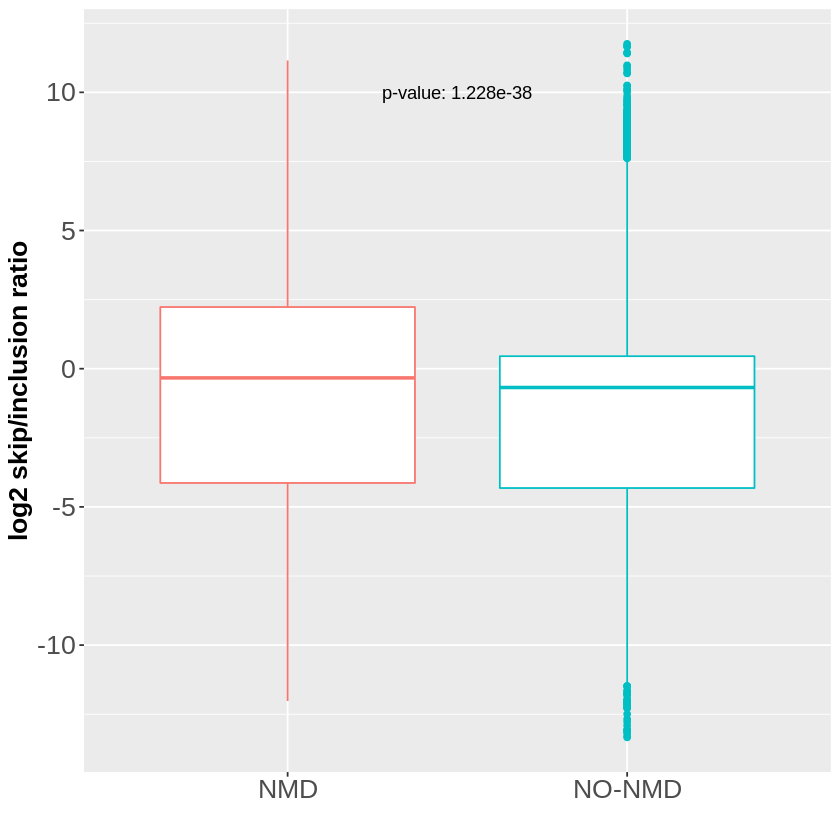

Saving 6.67 x 6.67 in image



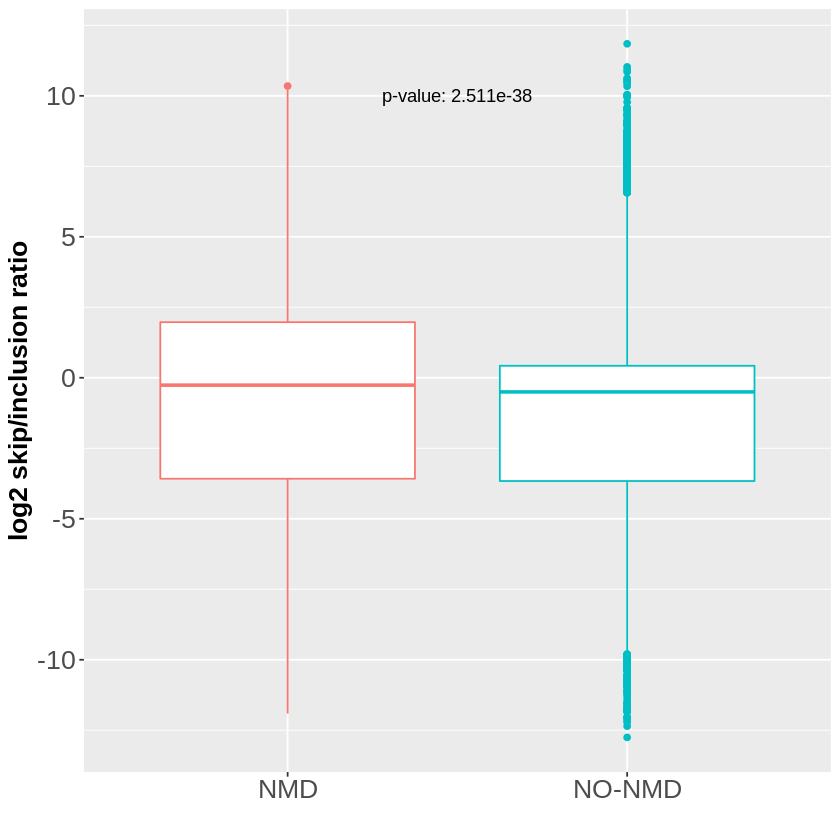

Saving 6.67 x 6.67 in image



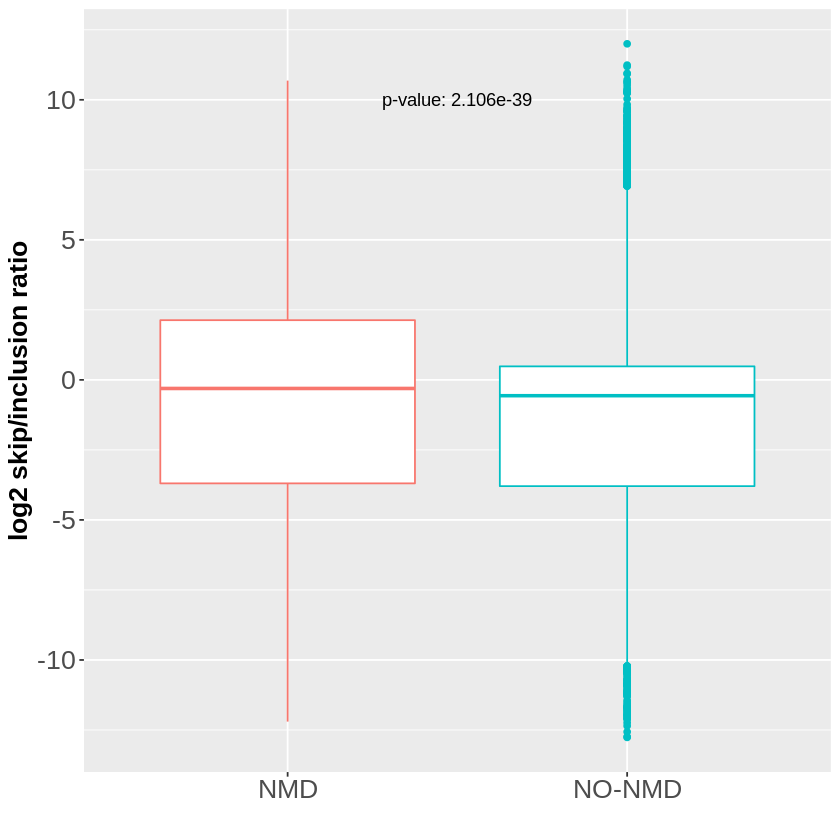

Saving 6.67 x 6.67 in image



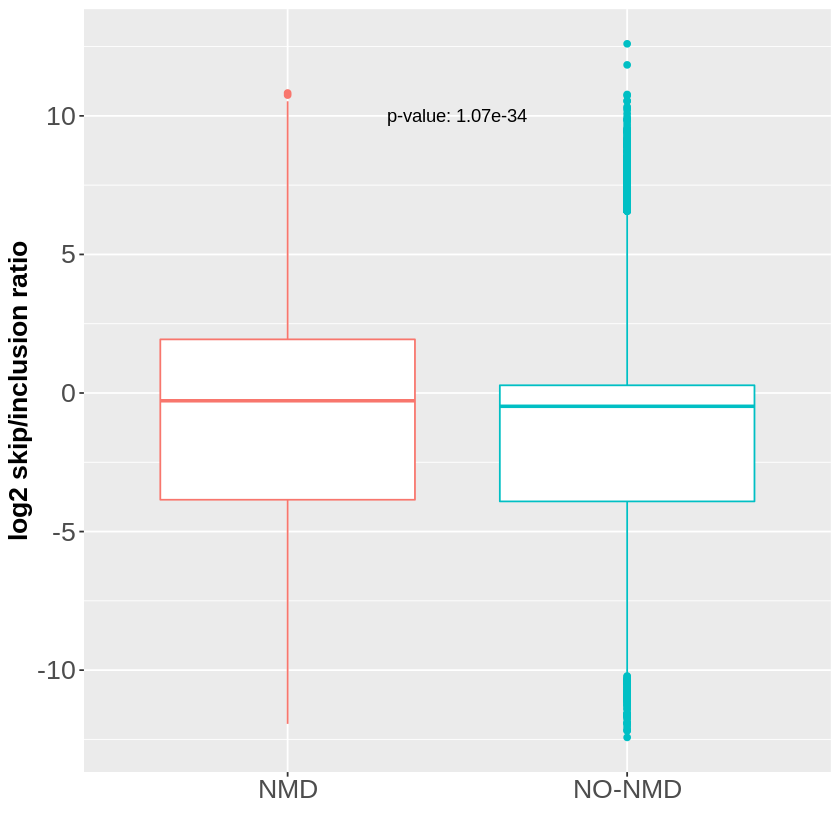

Saving 6.67 x 6.67 in image



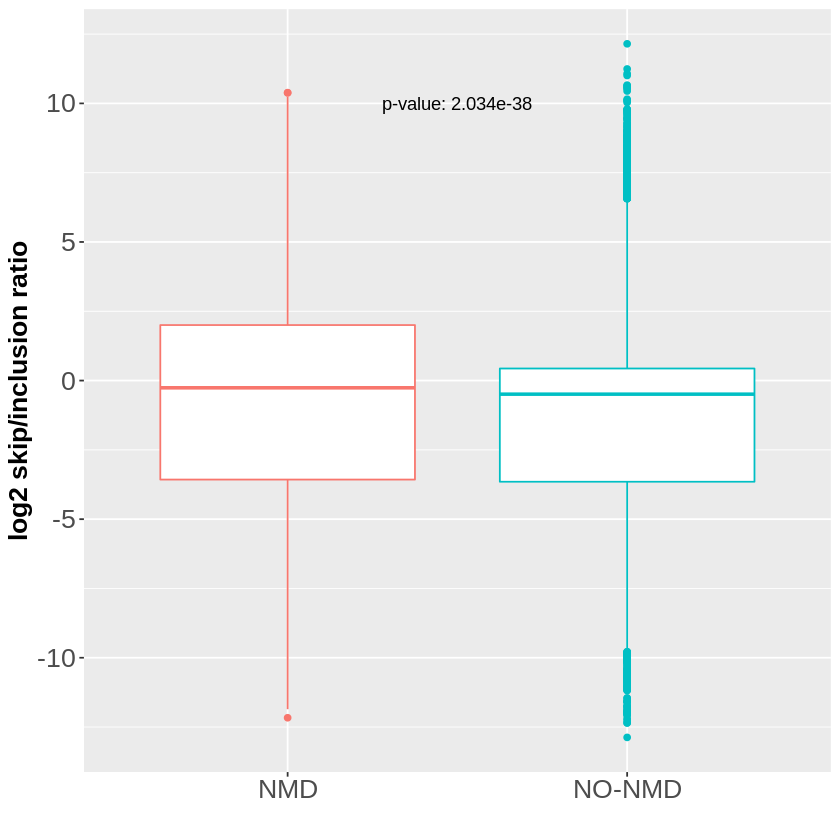

Saving 6.67 x 6.67 in image



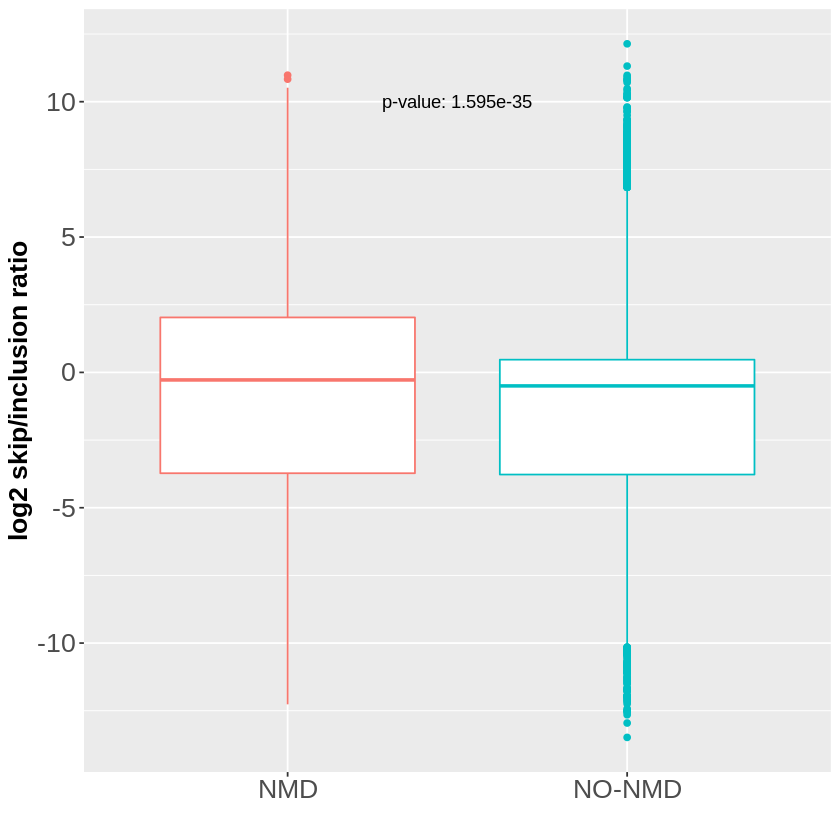

Saving 6.67 x 6.67 in image



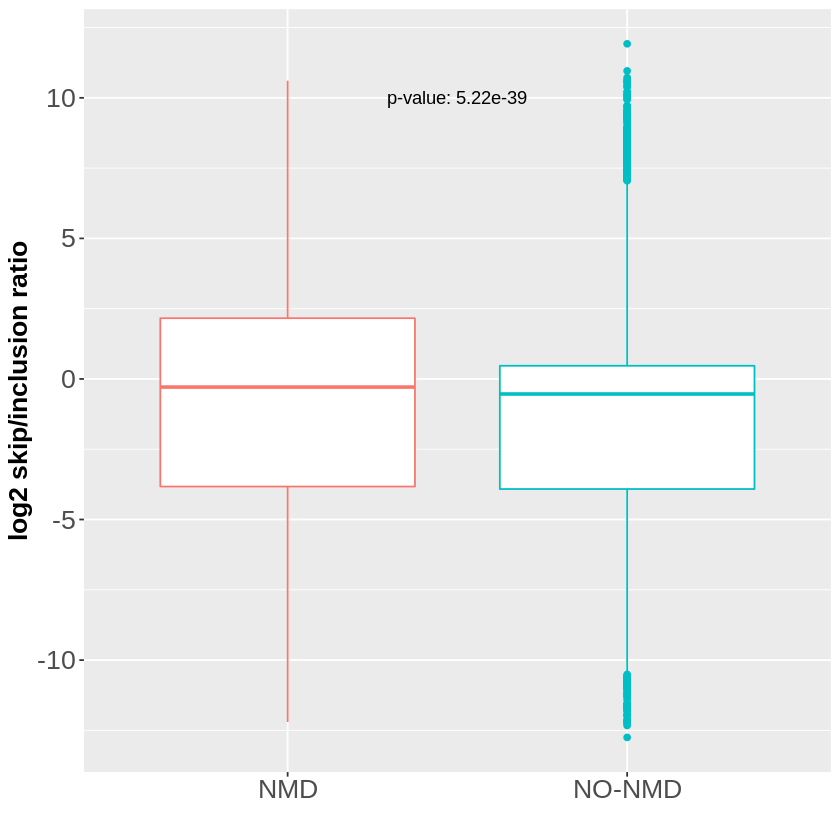

Saving 6.67 x 6.67 in image



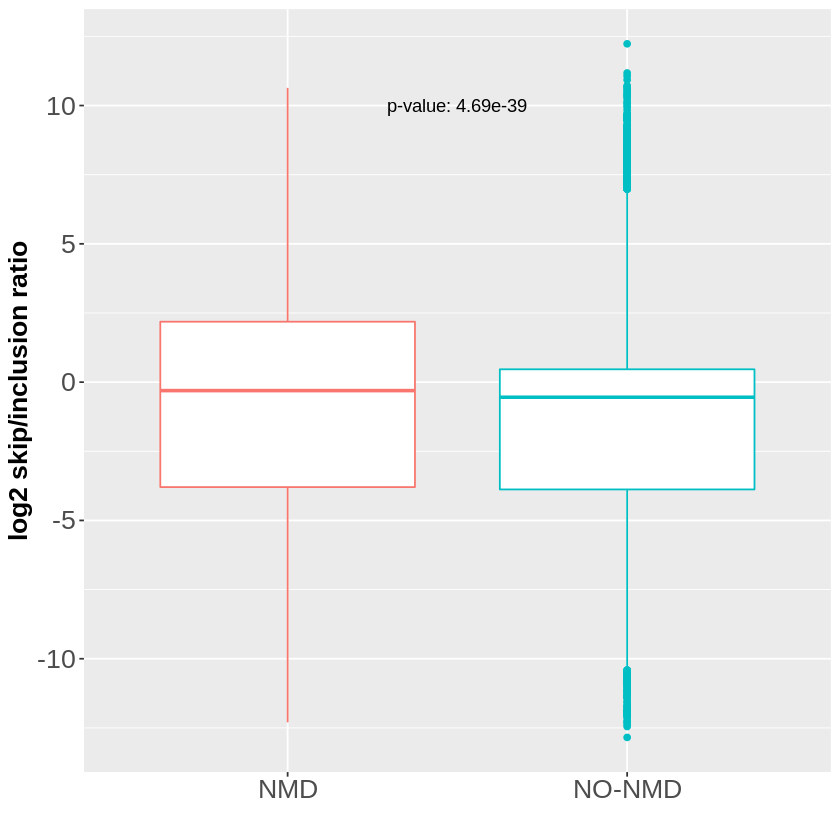

Saving 6.67 x 6.67 in image



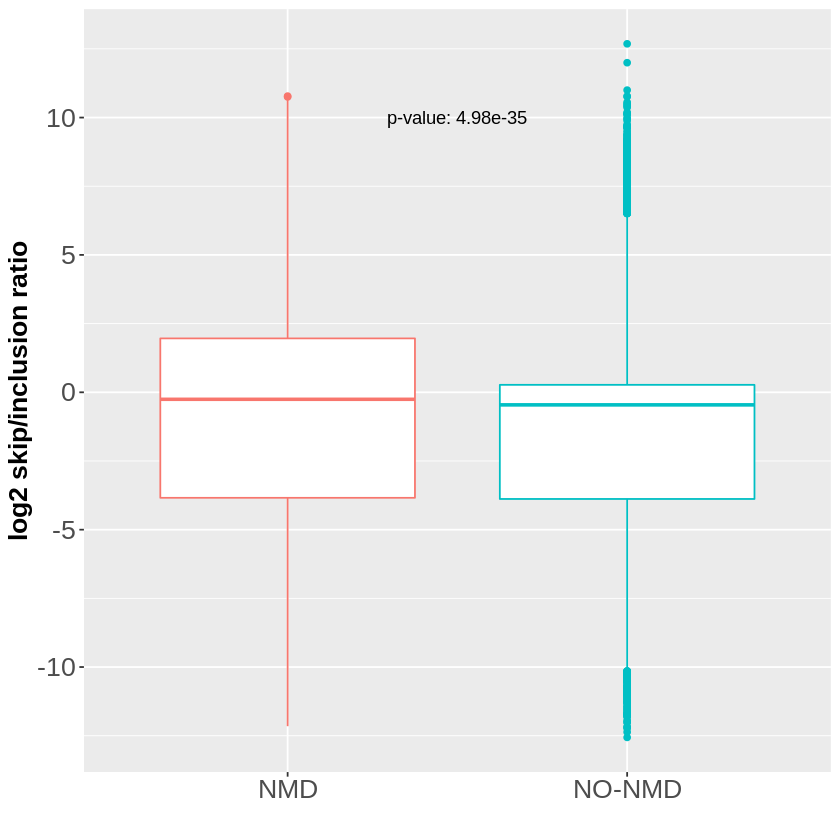

Saving 6.67 x 6.67 in image



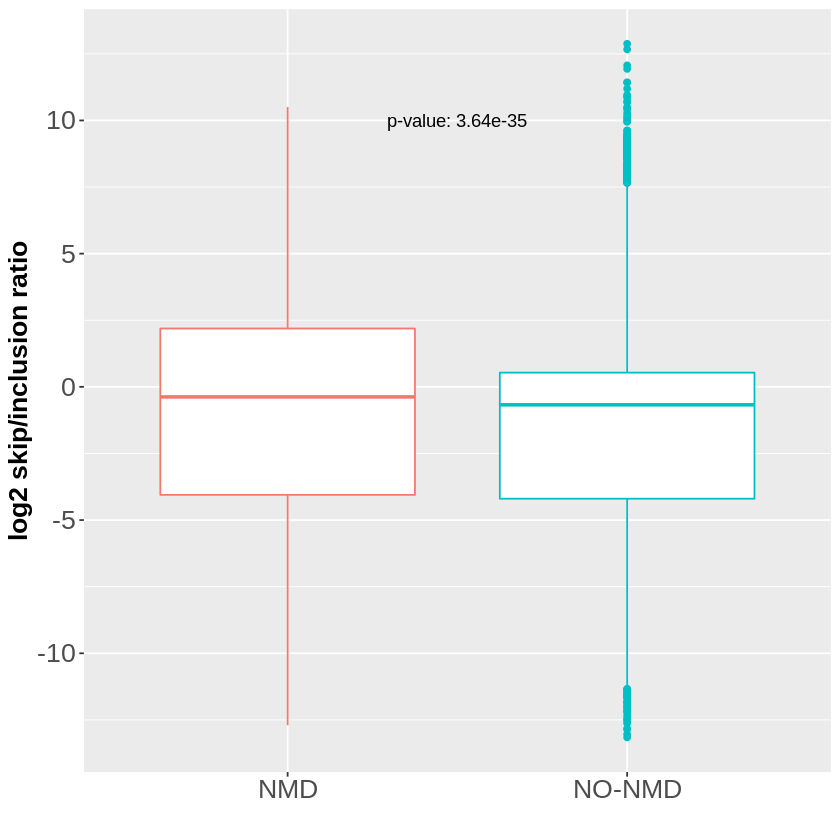

Saving 6.67 x 6.67 in image



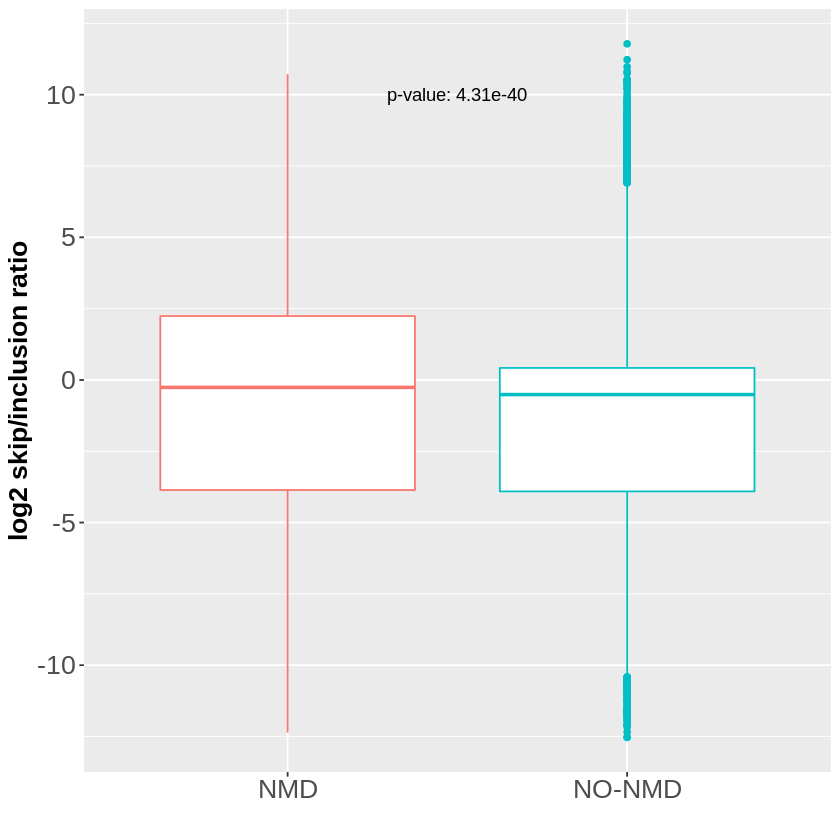

Saving 6.67 x 6.67 in image



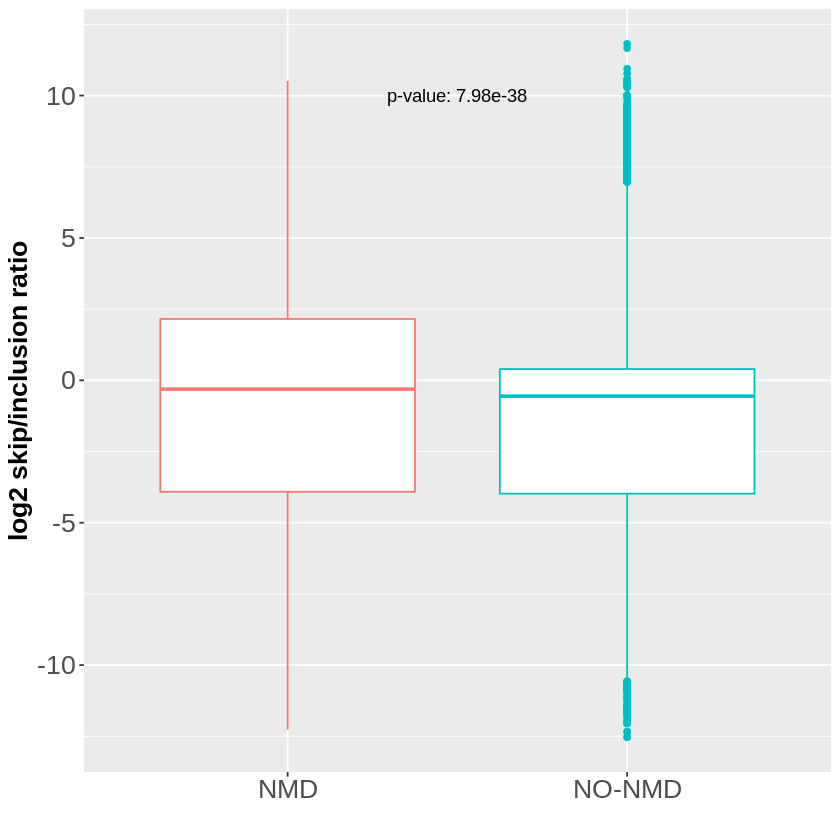

Saving 6.67 x 6.67 in image



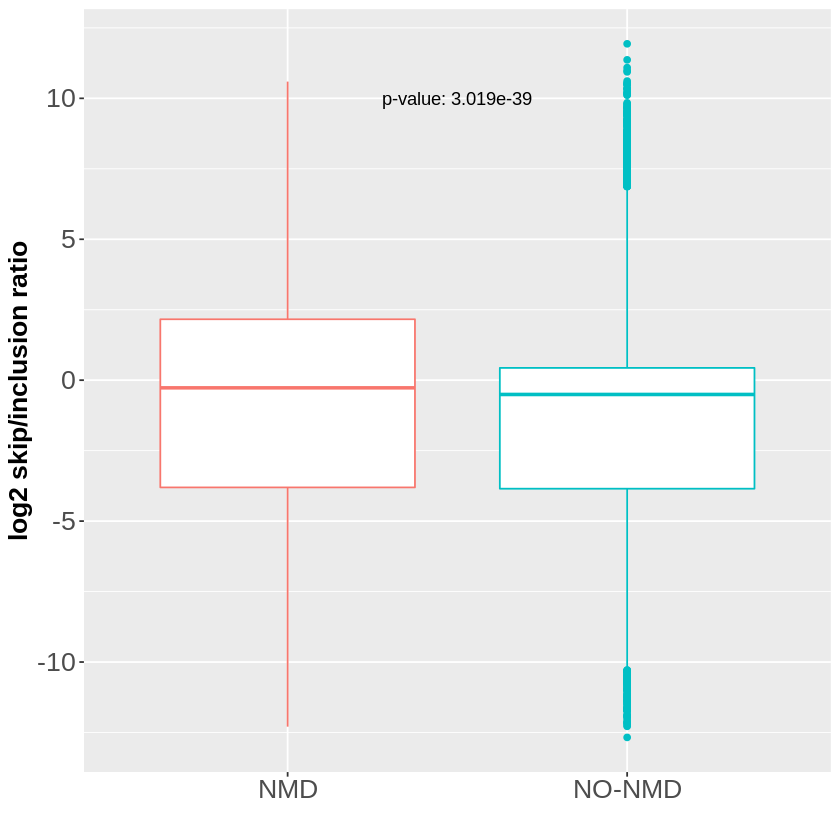

Saving 6.67 x 6.67 in image



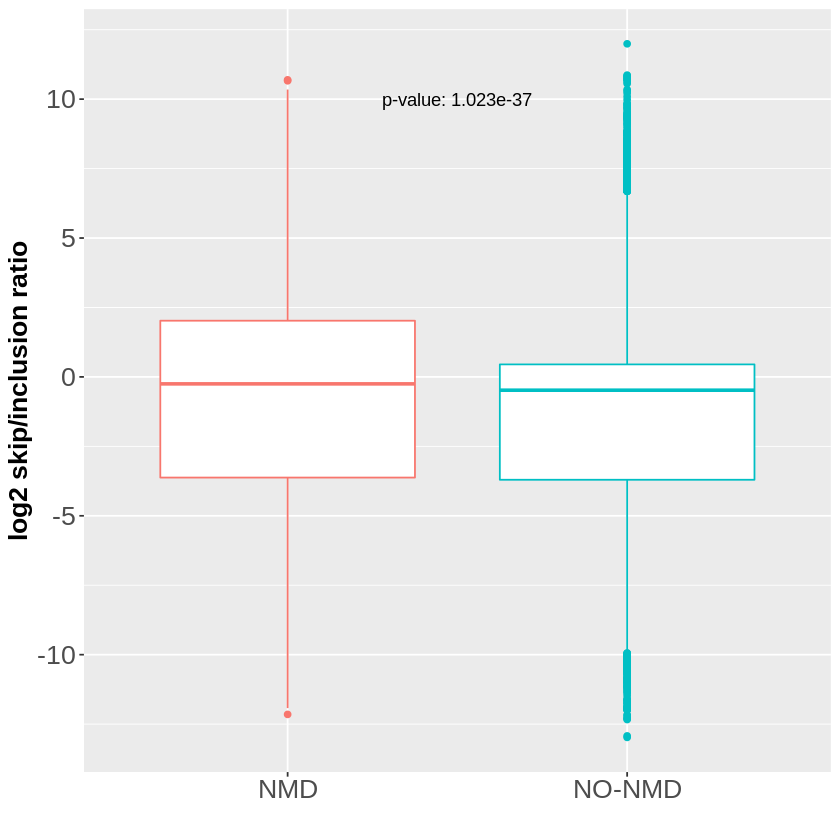

Saving 6.67 x 6.67 in image



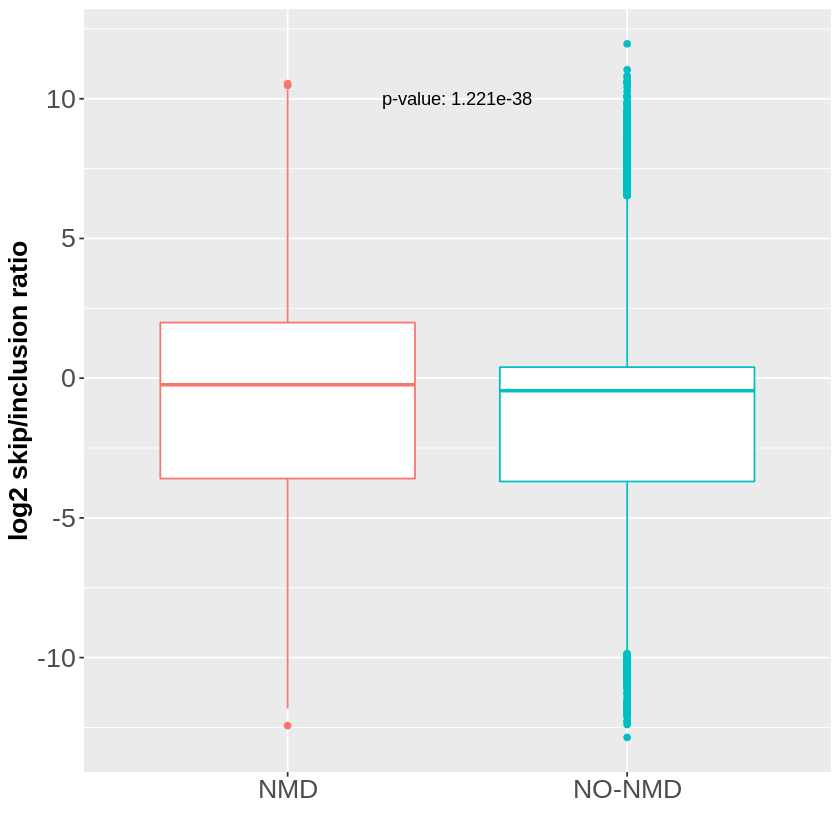

Saving 6.67 x 6.67 in image



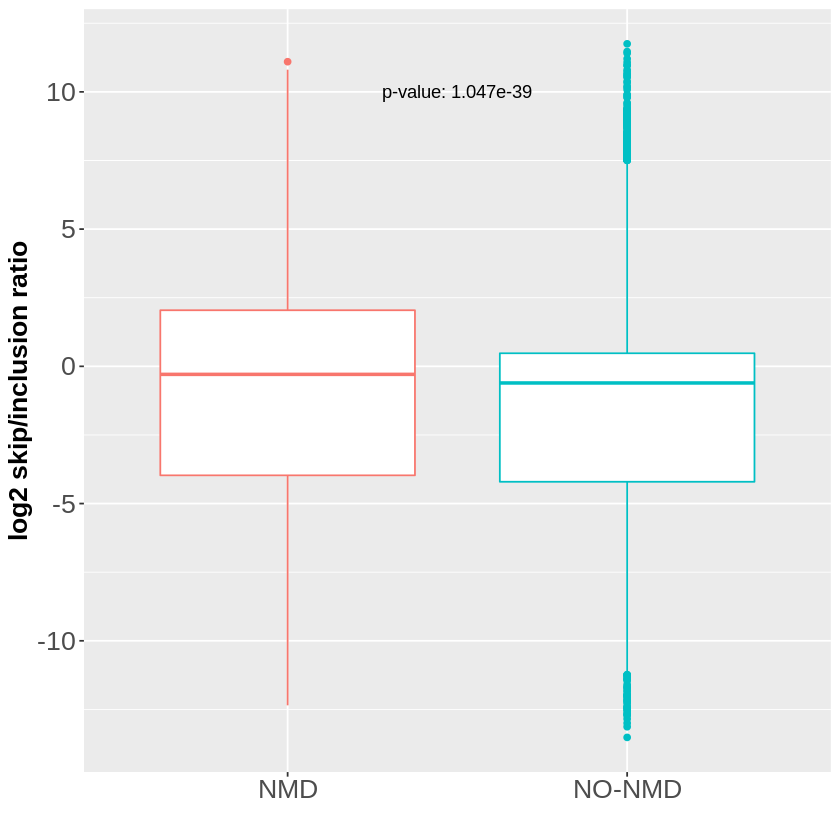

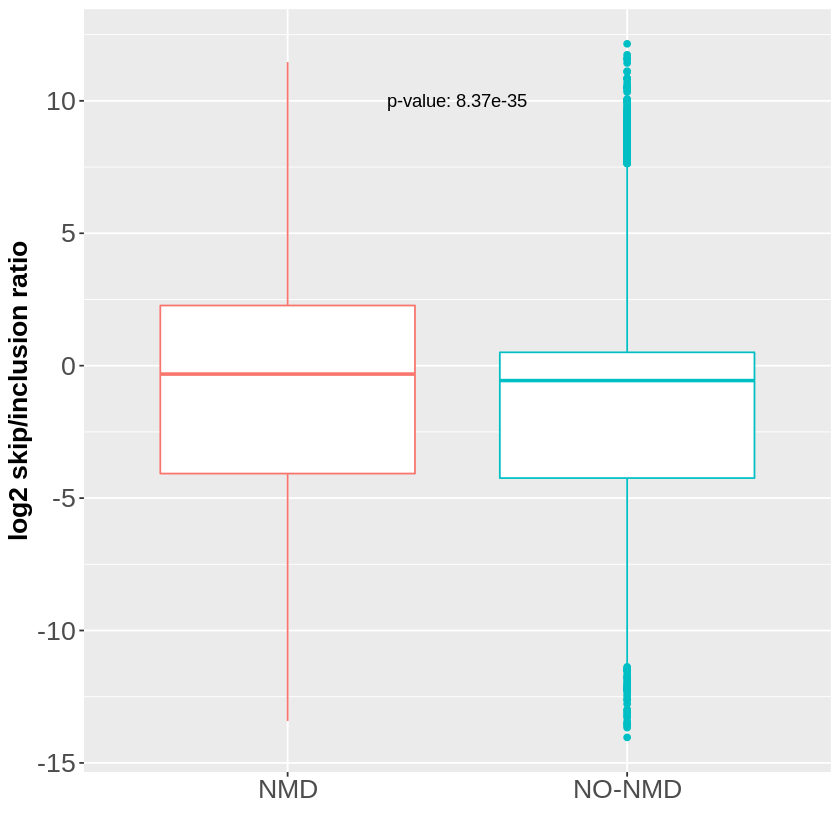

In [5]:
sum(colnames(inc.counts)==colnames(skip.counts))==ncol(skip.counts)

meta.data[["SMTSD"]] = as.character(meta.data[["SMTSD"]])

df<-data.frame()

for (tissue in unique(snakecase::to_snake_case(meta.data$SMTSD)))
{
    
    
    tissue.meta.data <- meta.data[ snakecase::to_snake_case(meta.data$SMTSD) == tissue,]
    
    skip.inc.count.ratio=log2(skip.counts[,colnames(skip.counts) %in% tissue.meta.data$SRR]+0.5)-
    
                        log2(inc.counts[,colnames(inc.counts) %in% tissue.meta.data$SRR]+0.5)
    
    
    df<-data.frame(type=c(ifelse(as.numeric(nmd.tab$num.nmd)>0,'NMD','NO-NMD')),
                            
                            log2counts=c(rowMeans(skip.inc.count.ratio)))

    
    pval<-wilcox.test(df$log2counts[df$type=='NMD'],df$log2counts[df$type=='NO-NMD'],paired=F)$p.value
  
    p <- ggplot(df, aes(x=type, y=log2counts,color=type)) + geom_boxplot()+theme(plot.title = element_text(hjust = 0.5))+
    ylab('log2 skip/inclusion ratio')+xlab('')+
    theme(axis.text=element_text(size=16), axis.title=element_text(size=16,face="bold"))+ theme(legend.position="none")+
    annotate("text", x=1.5, y=10, label= paste0("p-value: ",round(pval,-log10(pval)+3))) 

    plot(p) 
    nmd_plot_name <- paste0(paste0("../pdf/NMD_plot_",tissue),".pdf")
    ggsave(file = nmd_plot_name, plot = p)
}
    
    

## Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

## Appendix

### Appendix 1. Checksums with the sha256 algorithm

In [ ]:
notebook_id   = "NMD-plot"


### Appendix 2. Library Metadata

In [ ]:
dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", notebook_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", notebook_id ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]